# Kaggle Data Science & Machine Learning Survey
![Kaggle](https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png)

Kaggle is an online community of data scientists and machine learning practitioners. You will work with the platform later more later in the course. 
For the fourth year Kaggle, surveyed its members in 2020 about their demographics, technologies they use and much more.  In this notebook you'll get a first glimpse on how to explore a new data set. Don't worry if you don't understand everything. You hopefully will by the end of the course. For now, just have a look at the code, execute the cells and get an understaning of the outputs.
This notebook is an excerpt of the Kaggle notebook you can find [here](https://www.kaggle.com/maksymshkliarevskyi/kaggle-ml-ds-survey-relations-change-in-time).

In [1]:
!pip install seaborn --upgrade

  Using cached https://files.pythonhosted.org/packages/68/ad/6c2406ae175f59ec616714e408979b674fe27b9587f79d59a528ddfbcd5b/seaborn-0.11.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b2/55/6681ac2cc8de9bb612b1a777606e5beef240bf63aaa6cb03f44af5f42a77/kiwisolver-1.3.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# A first look at the data

In [4]:
data_2018 = pd.read_csv('data/kaggle_survey_2018_responses.csv')
data_2019 = pd.read_csv('data/kaggle_survey_2019_responses.csv')
data_2020 = pd.read_csv('data/kaggle_survey_2020_responses.csv')

print('Data 2018 shape: {}'.format(data_2018.shape))
print('Data 2019 shape: {}'.format(data_2019.shape))
print('Data 2020 shape: {}'.format(data_2020.shape))
print('-'*30)
print('Head of the data 2020:')
data_2020.head()

Data 2018 shape: (23860, 395)
Data 2019 shape: (19718, 246)
Data 2020 shape: (20037, 355)
------------------------------
Head of the data 2020:


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Data 2018 types: \n{}'.format(data_2018.dtypes.value_counts()))
print('-'*20)
print('Data 2019 types: \n{}'.format(data_2019.dtypes.value_counts()))
print('-'*20)
print('Data 2020 types: \n{}'.format(data_2020.dtypes.value_counts()))

Data 2018 types: 
object    395
dtype: int64
--------------------
Data 2019 types: 
object    246
dtype: int64
--------------------
Data 2020 types: 
object    355
dtype: int64


In [6]:
print('Columns with NaN (2018): %d' %data_2018.isna().any().sum())
print('Columns with NaN (2019): %d' %data_2019.isna().any().sum())
print('Columns with NaN (2020): %d' %data_2020.isna().any().sum())

Columns with NaN (2018): 356
Columns with NaN (2019): 214
Columns with NaN (2020): 351


Almost all columns have NaN values.

# DATA 2020

In [7]:
# data frame without explanation row
df = data_2020.drop(0, axis = 0)

There are a lot of relations that we can find in this data. Let's look at some of them.

In [8]:
def bar_plot(x, y, title, palette_len, xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None, 
             top_visible = False, right_visible = False, 
             bottom_visible = True, left_visible = False,
             xlabel = None, ylabel = None, figsize = (10, 4),
             axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')

    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)

    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = reversed(sns.color_palette("viridis", len(palette_len))))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels, fontfamily = 'serif')
    ax.set_yticklabels(yticklabels, fontfamily = 'serif')
    plt.xlabel(xlabel, fontfamily = 'serif')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()

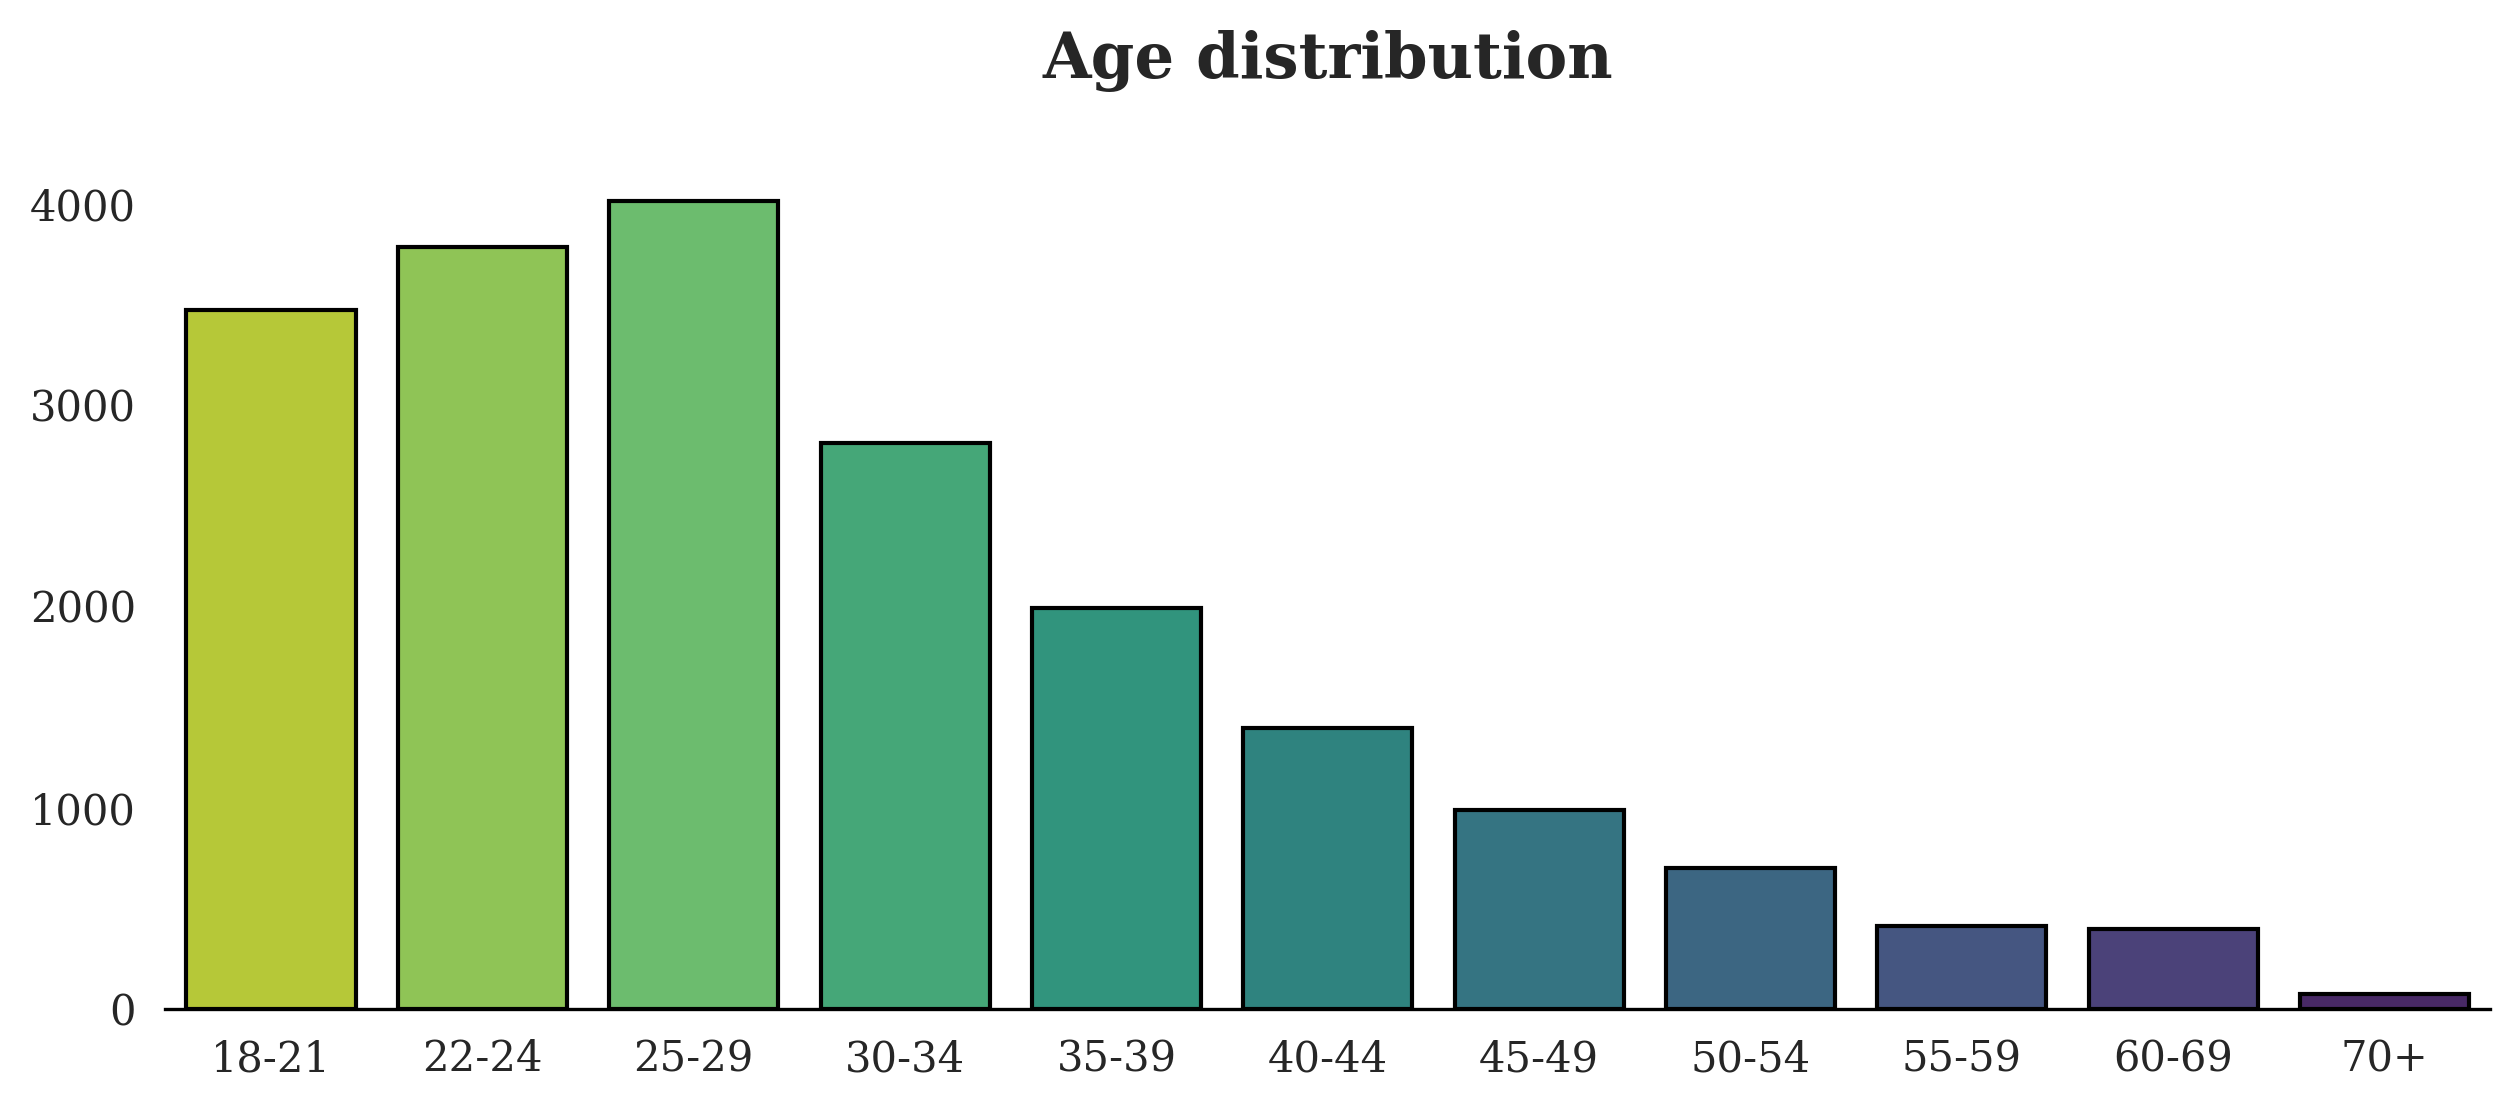

In [9]:
sns.set_style("whitegrid")
age = df.Q1.value_counts().sort_index()

bar_plot(x = age.index, 
         y = age,
         title = 'Age distribution',
         palette_len = age.index, 
         ylim = (0, 4500), 
         xticklabels = age.index,
         yticklabels = ['0', '', '1000', '', '2000', '', '3000', '', '4000', ''])

Then let's look at the salary distribution.

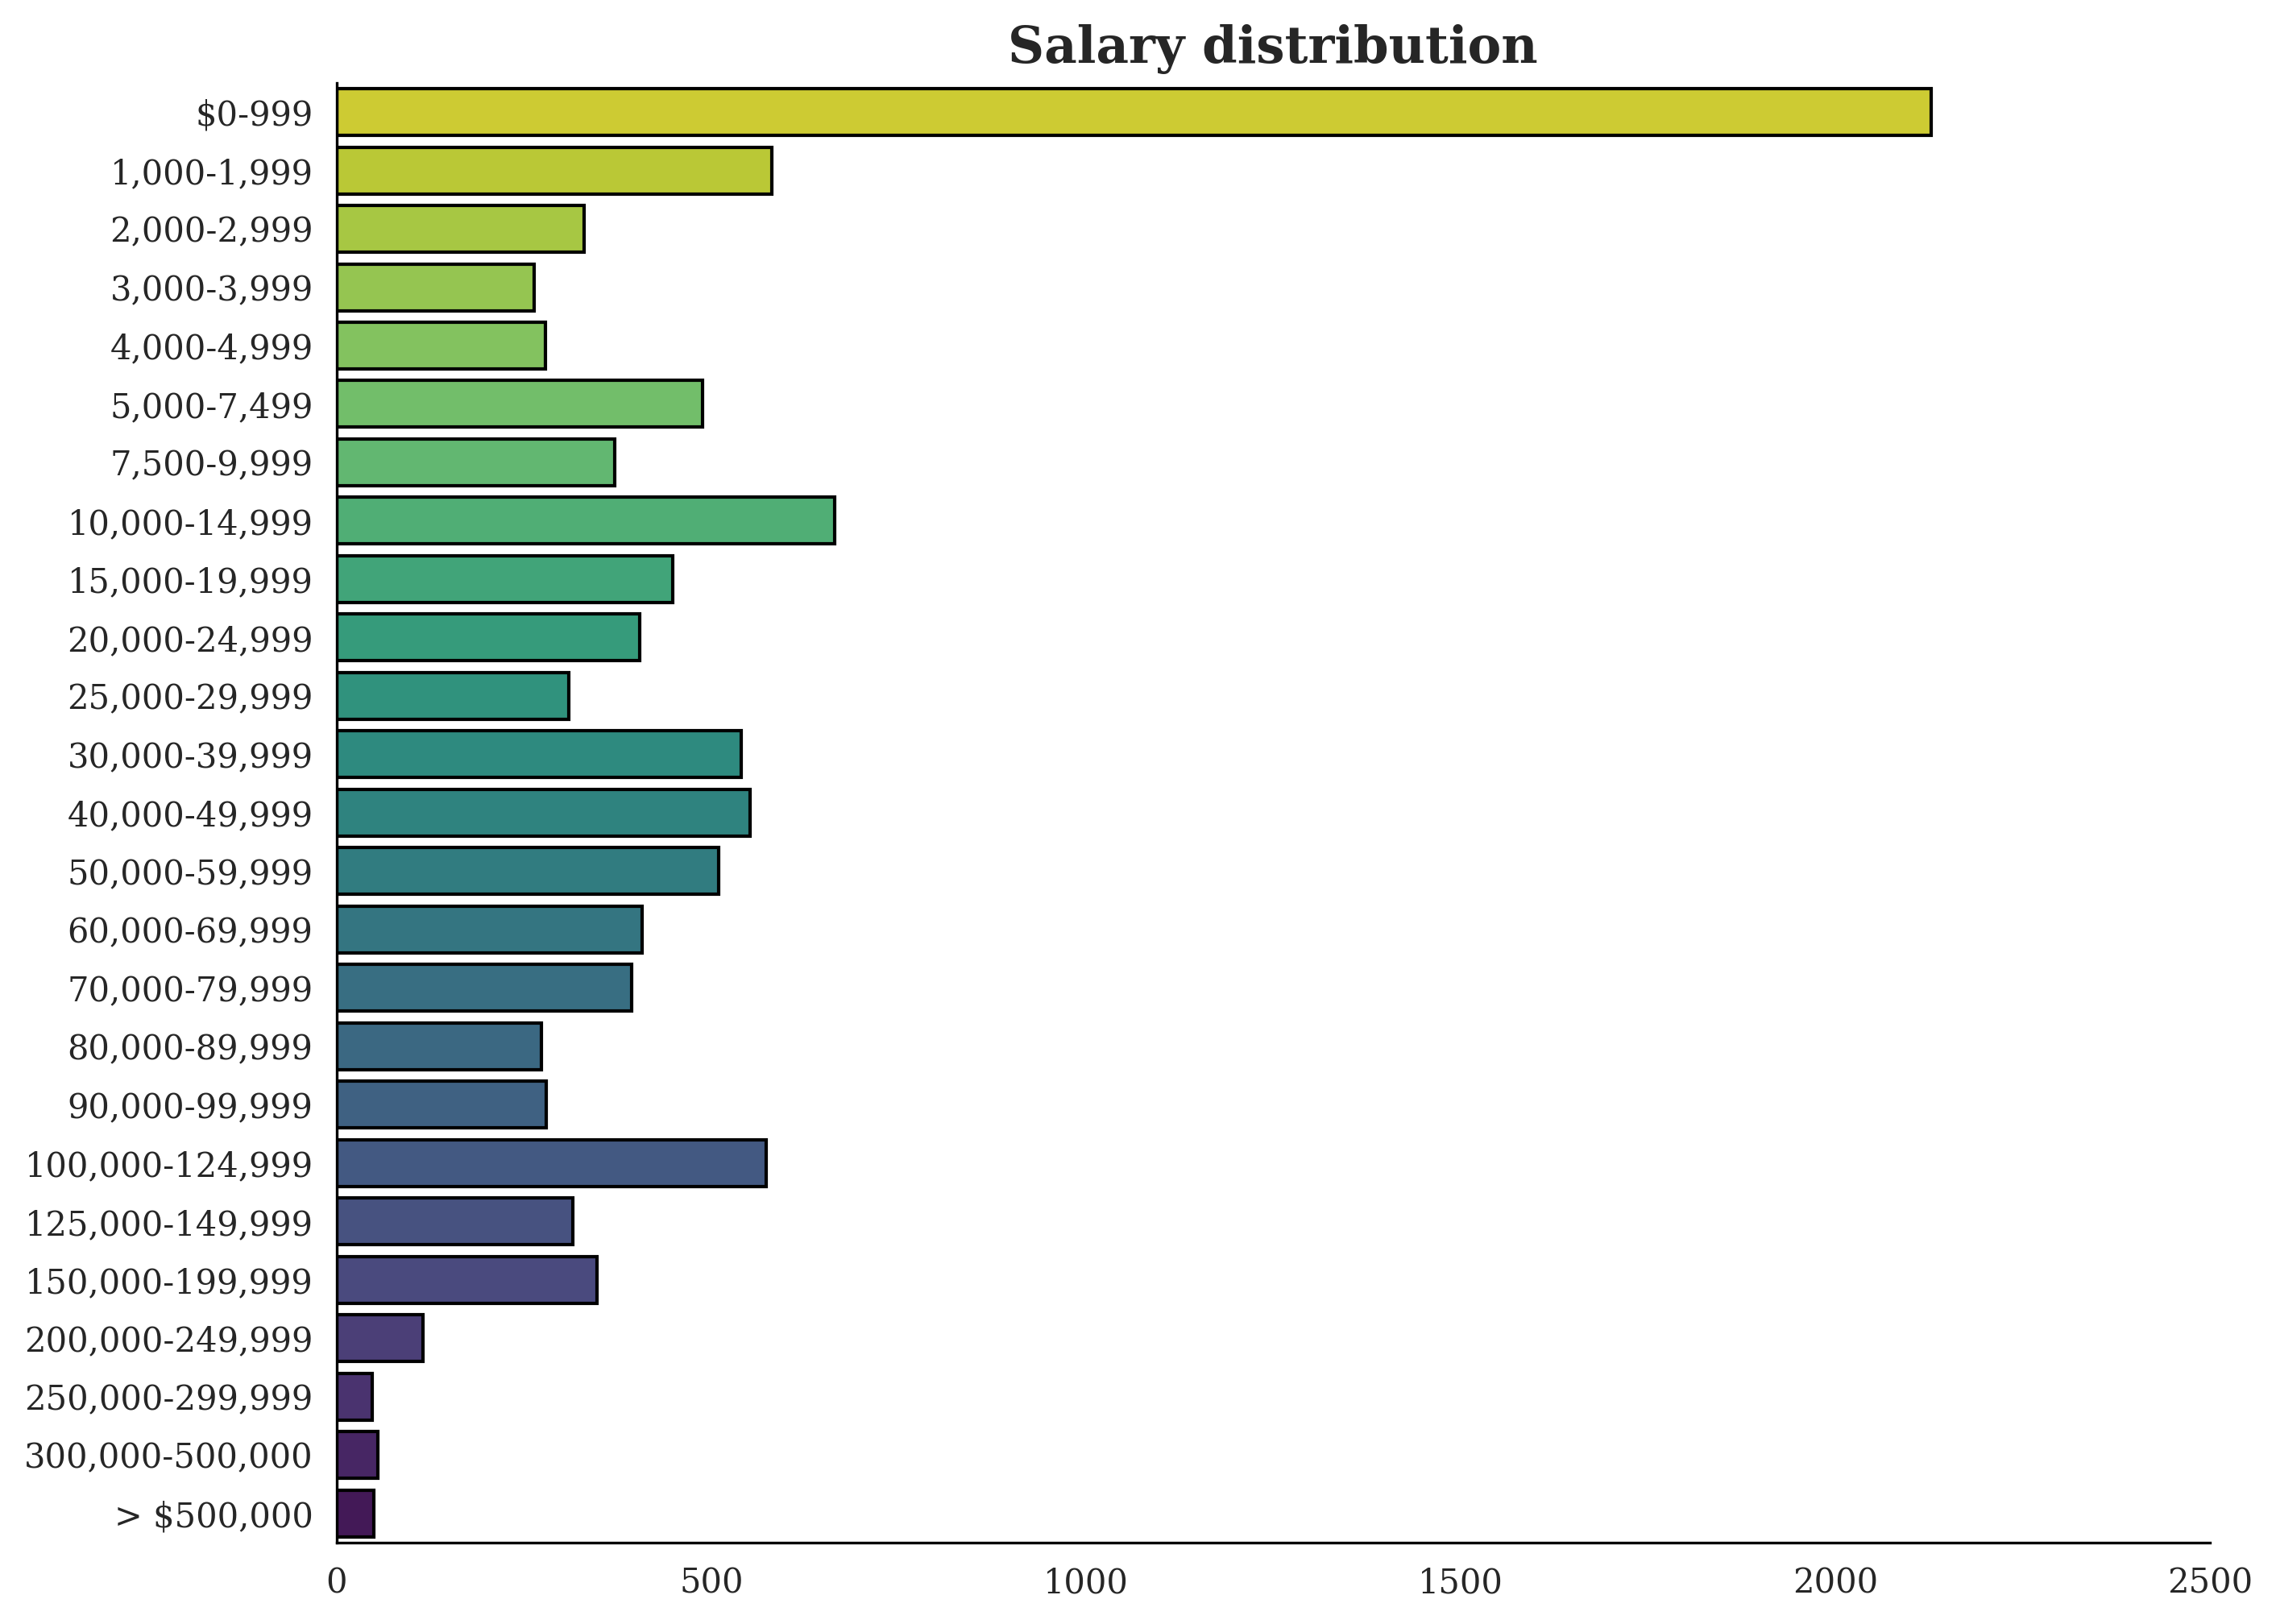

In [10]:
salary_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', 
                '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999',
                '15,000-19,999', '20,000-24,999', '25,000-29,999', 
                '30,000-39,999', '40,000-49,999', '50,000-59,999', 
                '60,000-69,999', '70,000-79,999', '80,000-89,999', 
                '90,000-99,999', '100,000-124,999', '125,000-149,999',
                '150,000-199,999', '200,000-249,999', '250,000-299,999', 
                '300,000-500,000', '> $500,000']
salary = df.Q24.fillna('unknown').value_counts()[salary_order]

bar_plot(x = salary, 
         y = salary.index,
         title = 'Salary distribution',
         palette_len = salary.index, 
         xlim = (0, 2500), 
         xticklabels = range(0, 2501, 500),
         yticklabels = salary.index,
         left_visible = True,
         figsize = (10, 8), axis_grid = 'x')

It is interesting to analyze the distribution of salaries according to different criteria.

In [11]:
max_salary = df.Q24.fillna('unknown-unknown') \
    .apply(lambda x: x.replace('$', '') \
    .replace('> 500,000', '500,000-500,000') \
    .replace(',', '') \
    .split("-")[1]).replace('unknown', np.nan).astype('float64') + 1

new_df = pd.DataFrame({'max_salary': max_salary, 'age': df.Q1})

In [12]:
def horizontal_boxplot(data, title, xlabel, order = None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)
    
    sns.boxplot(x = data, y = new_df.max_salary, ax = ax,
                palette = reversed(sns.color_palette("viridis", data.nunique())),
                order = order)
    plt.xlabel('')
    plt.ylabel('Salary', fontfamily = 'serif')    
    plt.xticks(fontfamily = 'serif')
    plt.yticks(fontfamily = 'serif')
    ax.grid(axis = 'y', linestyle = '--', alpha = 0.9)
    plt.show()
    
def vertical_boxplot(data, title, ylabel, order = None):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_visible(False)
    
    sns.boxplot(y = data, x = new_df.max_salary, ax = ax,
                palette = reversed(sns.color_palette("viridis", data.nunique())),
                order = order)
    plt.xlabel('Salary', fontfamily = 'serif')
    plt.ylabel('')   
    plt.xticks(fontfamily = 'serif')
    plt.yticks(fontfamily = 'serif')
    ax.grid(axis = 'x', linestyle = '--', alpha = 0.9)
    plt.show()

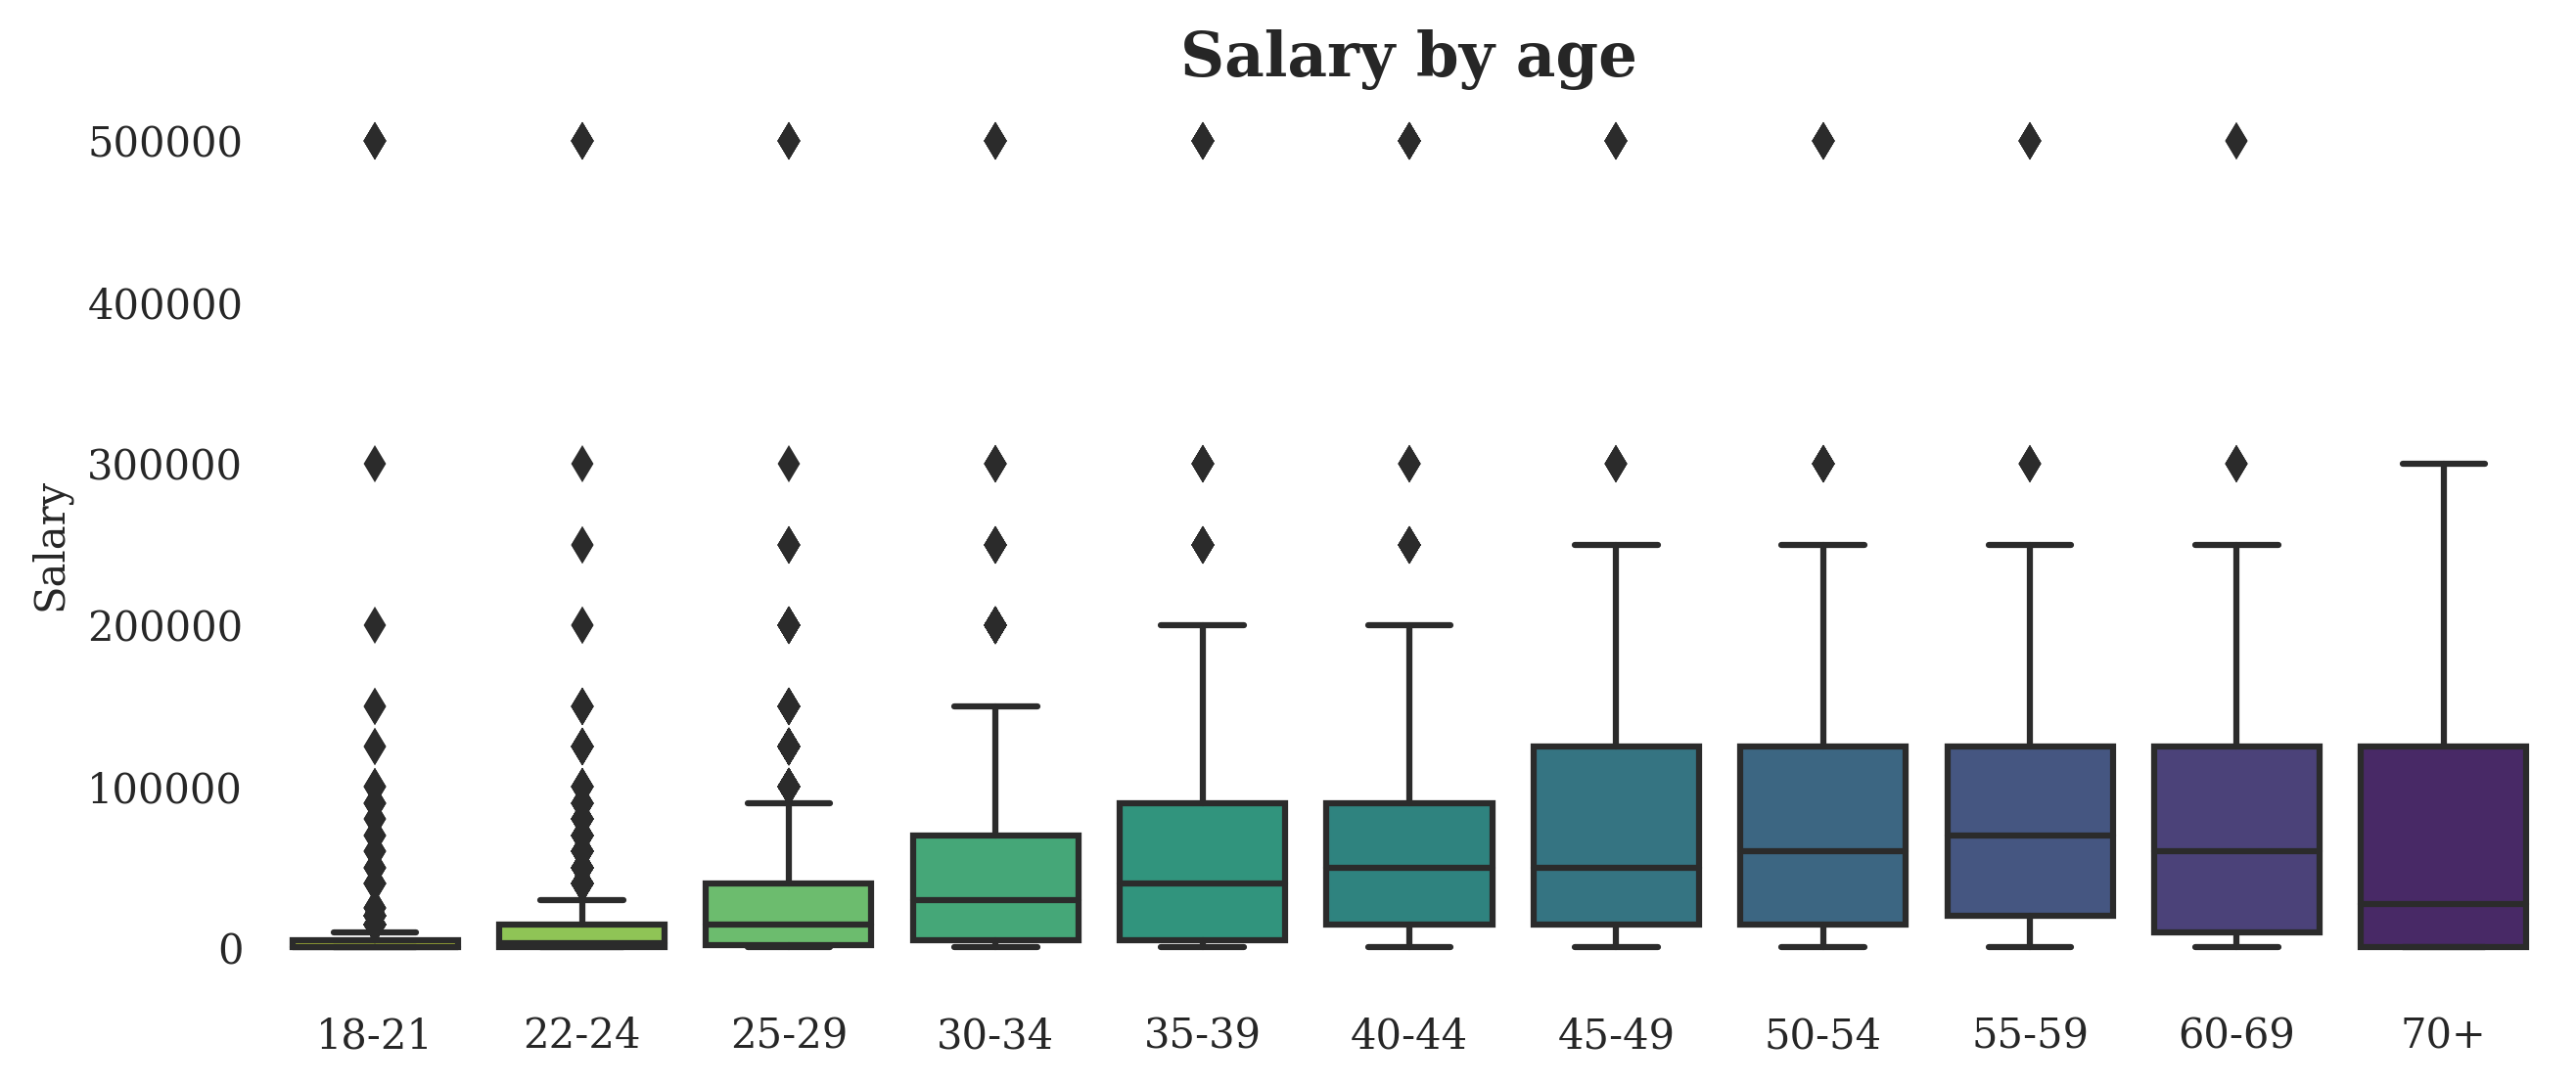

In [13]:
horizontal_boxplot(new_df.age.sort_values(ascending = True), 
                   'Salary by age', 'Age')

The salary rises depending on age. It looks logical.

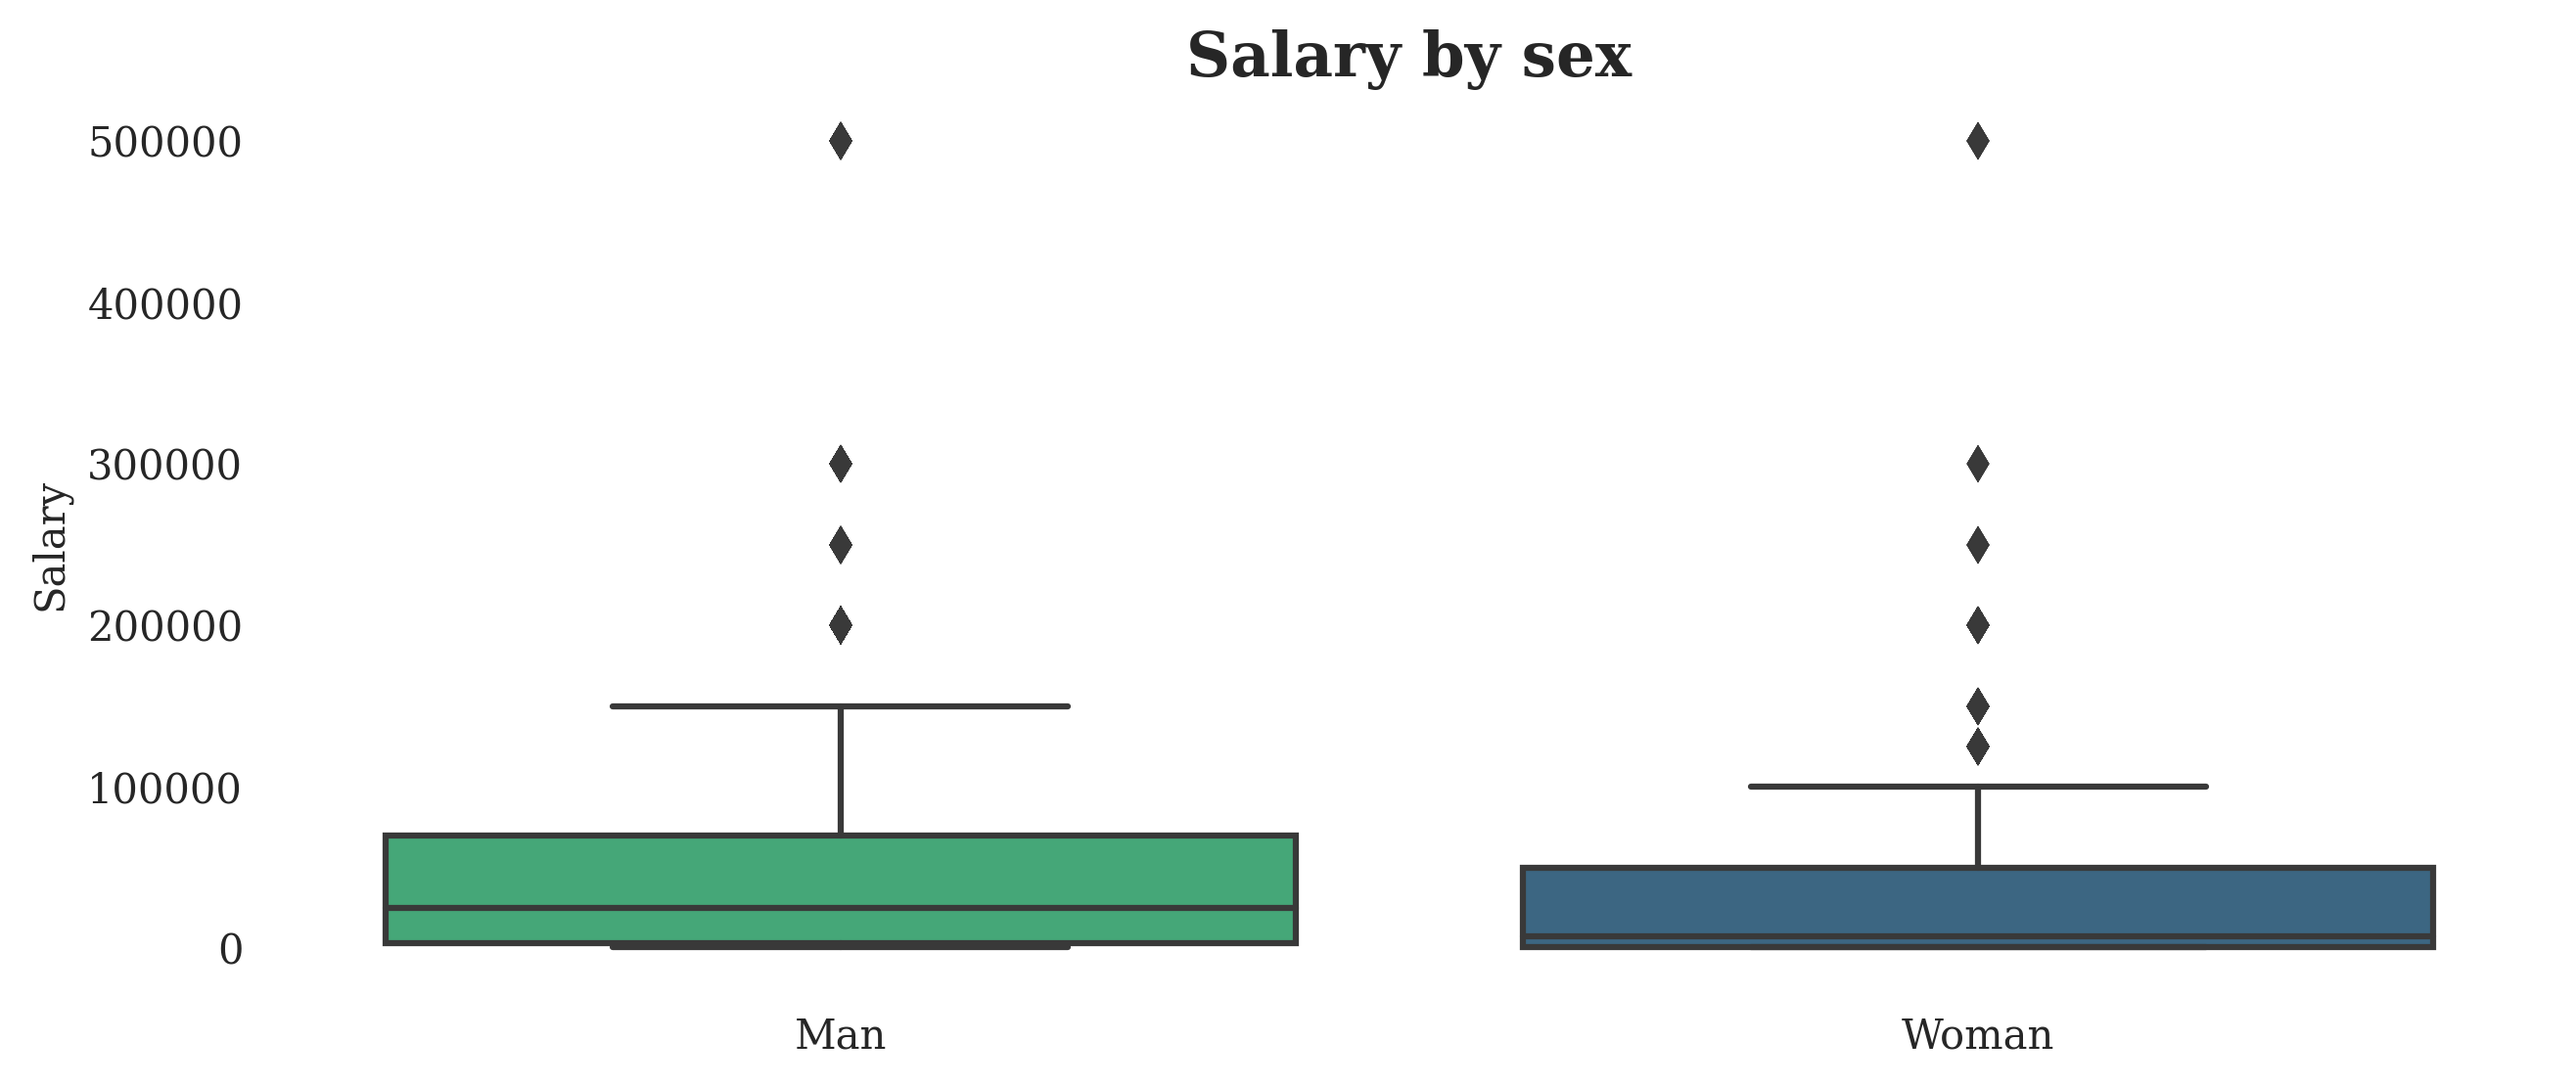

In [14]:
new_df['sex'] = df.Q2

horizontal_boxplot(new_df.sex[new_df.sex.isin(['Man', 'Woman'])], 
                   'Salary by sex', 'Sex')

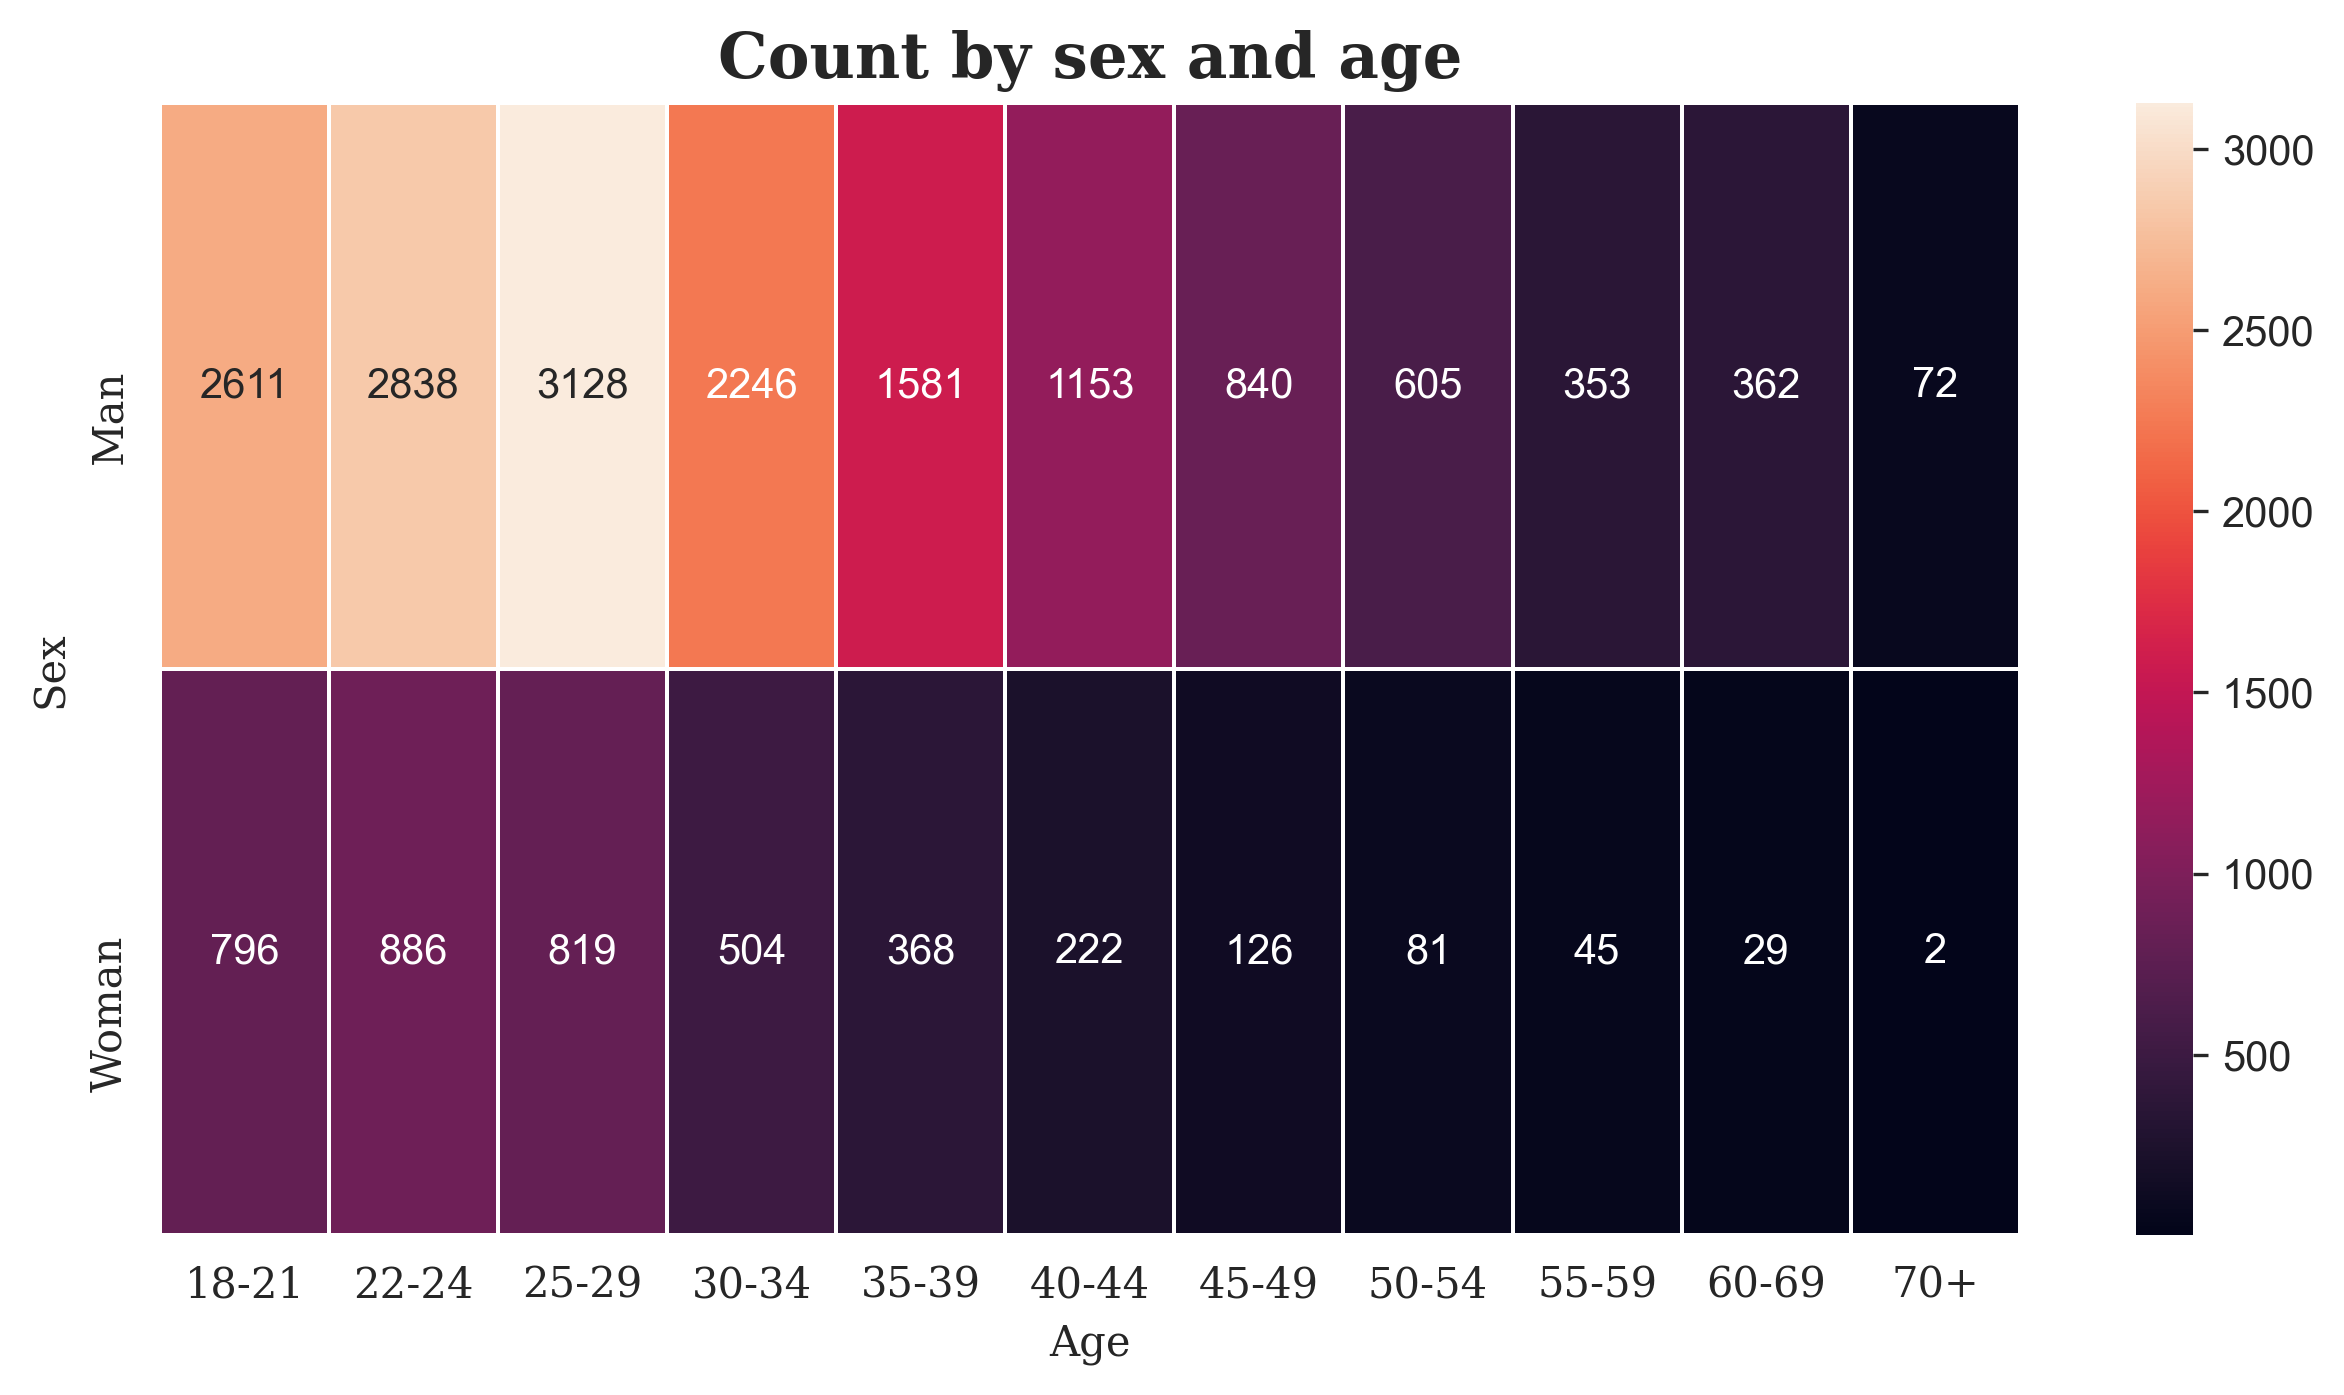

In [15]:
hm = pd.DataFrame(new_df[new_df.sex.isin(['Man', 'Woman'])][['sex', 'age']] \
                  .value_counts()).reset_index().pivot('sex', 'age', 0) \
                  .fillna(0).astype('int')

plt.figure(figsize=(10, 5))
plt.title('Count by sex and age', size = 15, fontweight = 'bold', fontfamily = 'serif')
sns.heatmap(hm, annot = True, fmt = "d", linewidths=.5)
plt.xlabel('Age', fontfamily = 'serif')
plt.ylabel('Sex', fontfamily = 'serif')
plt.xticks(fontfamily = 'serif')
plt.yticks(fontfamily = 'serif')
plt.show()

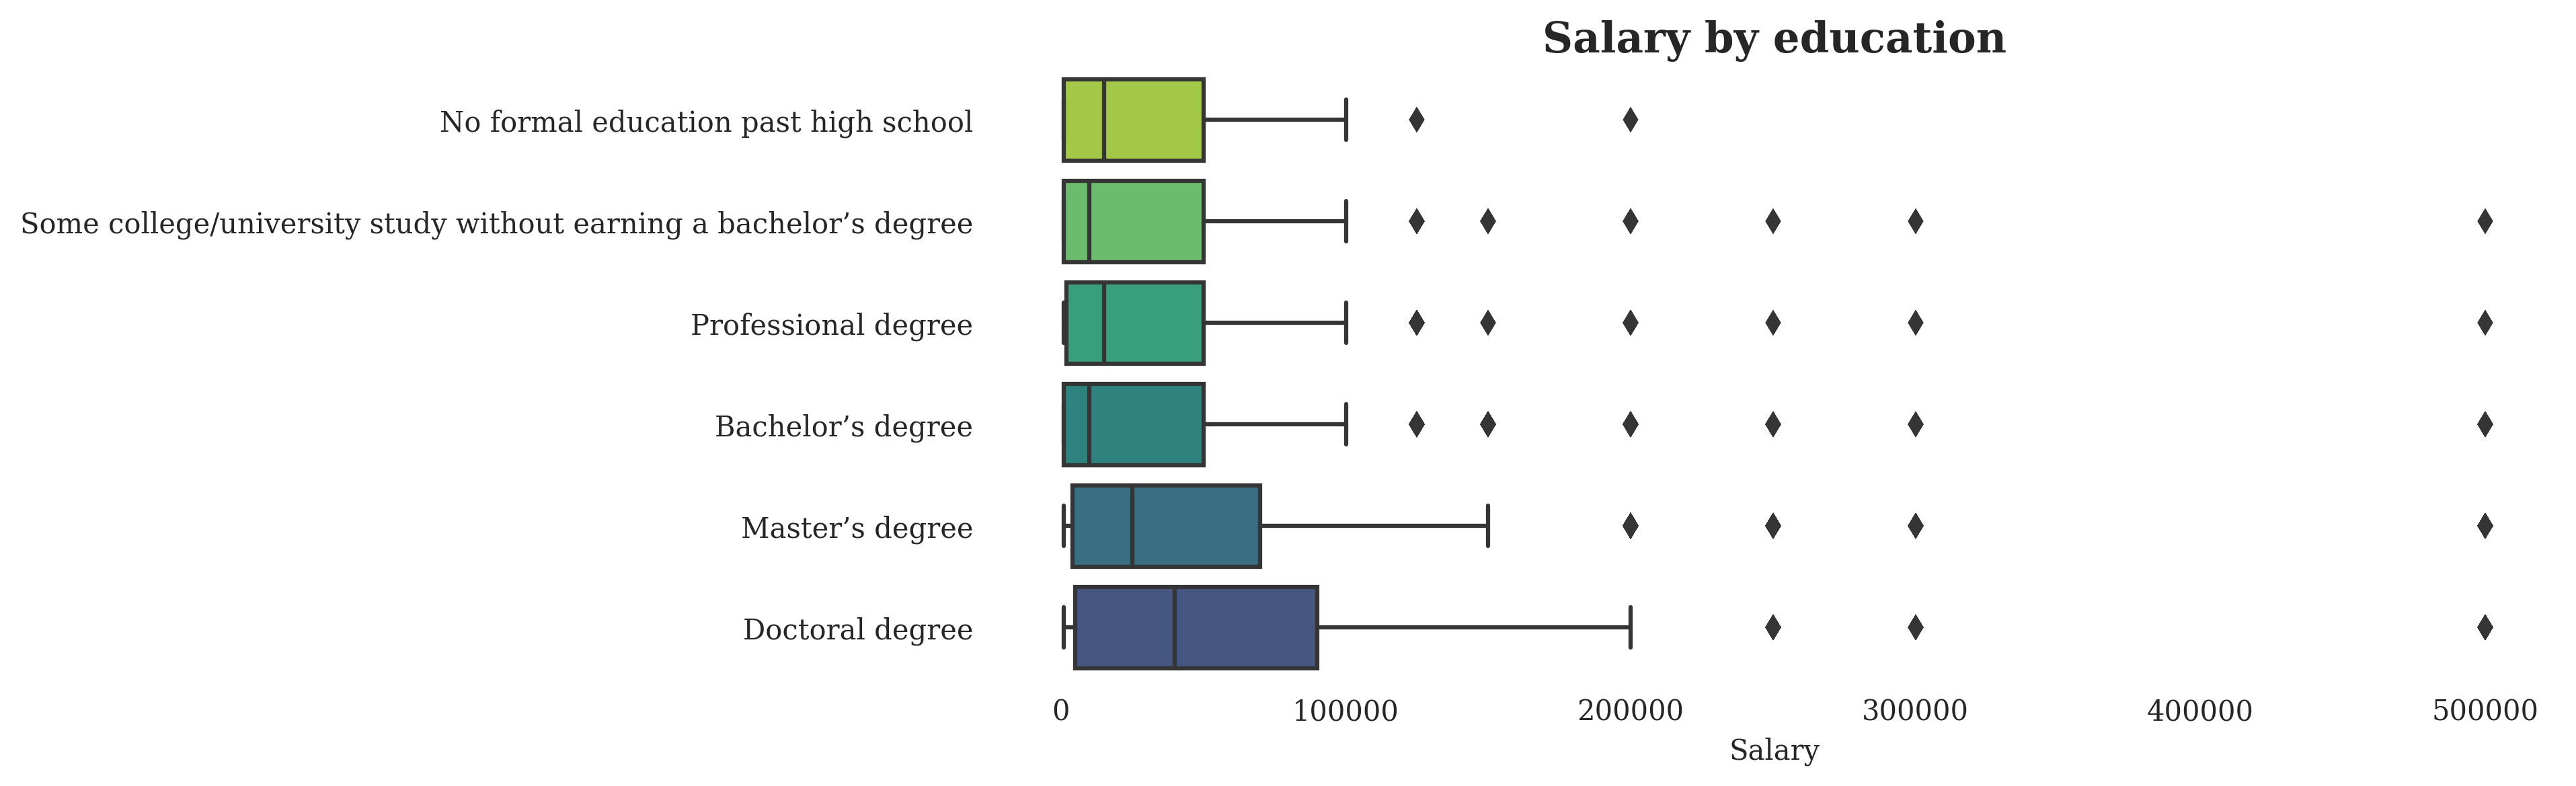

In [16]:
education_order = ['No formal education past high school', 
              'Some college/university study without earning a bachelor’s degree',
              'Professional degree', 'Bachelor’s degree', 
              'Master’s degree', 'Doctoral degree']
new_df['education'] = df.Q4

vertical_boxplot(new_df.education, 'Salary by education', 
                 'Education', order = education_order)

There is a clear dependence between academic degree and salary size.

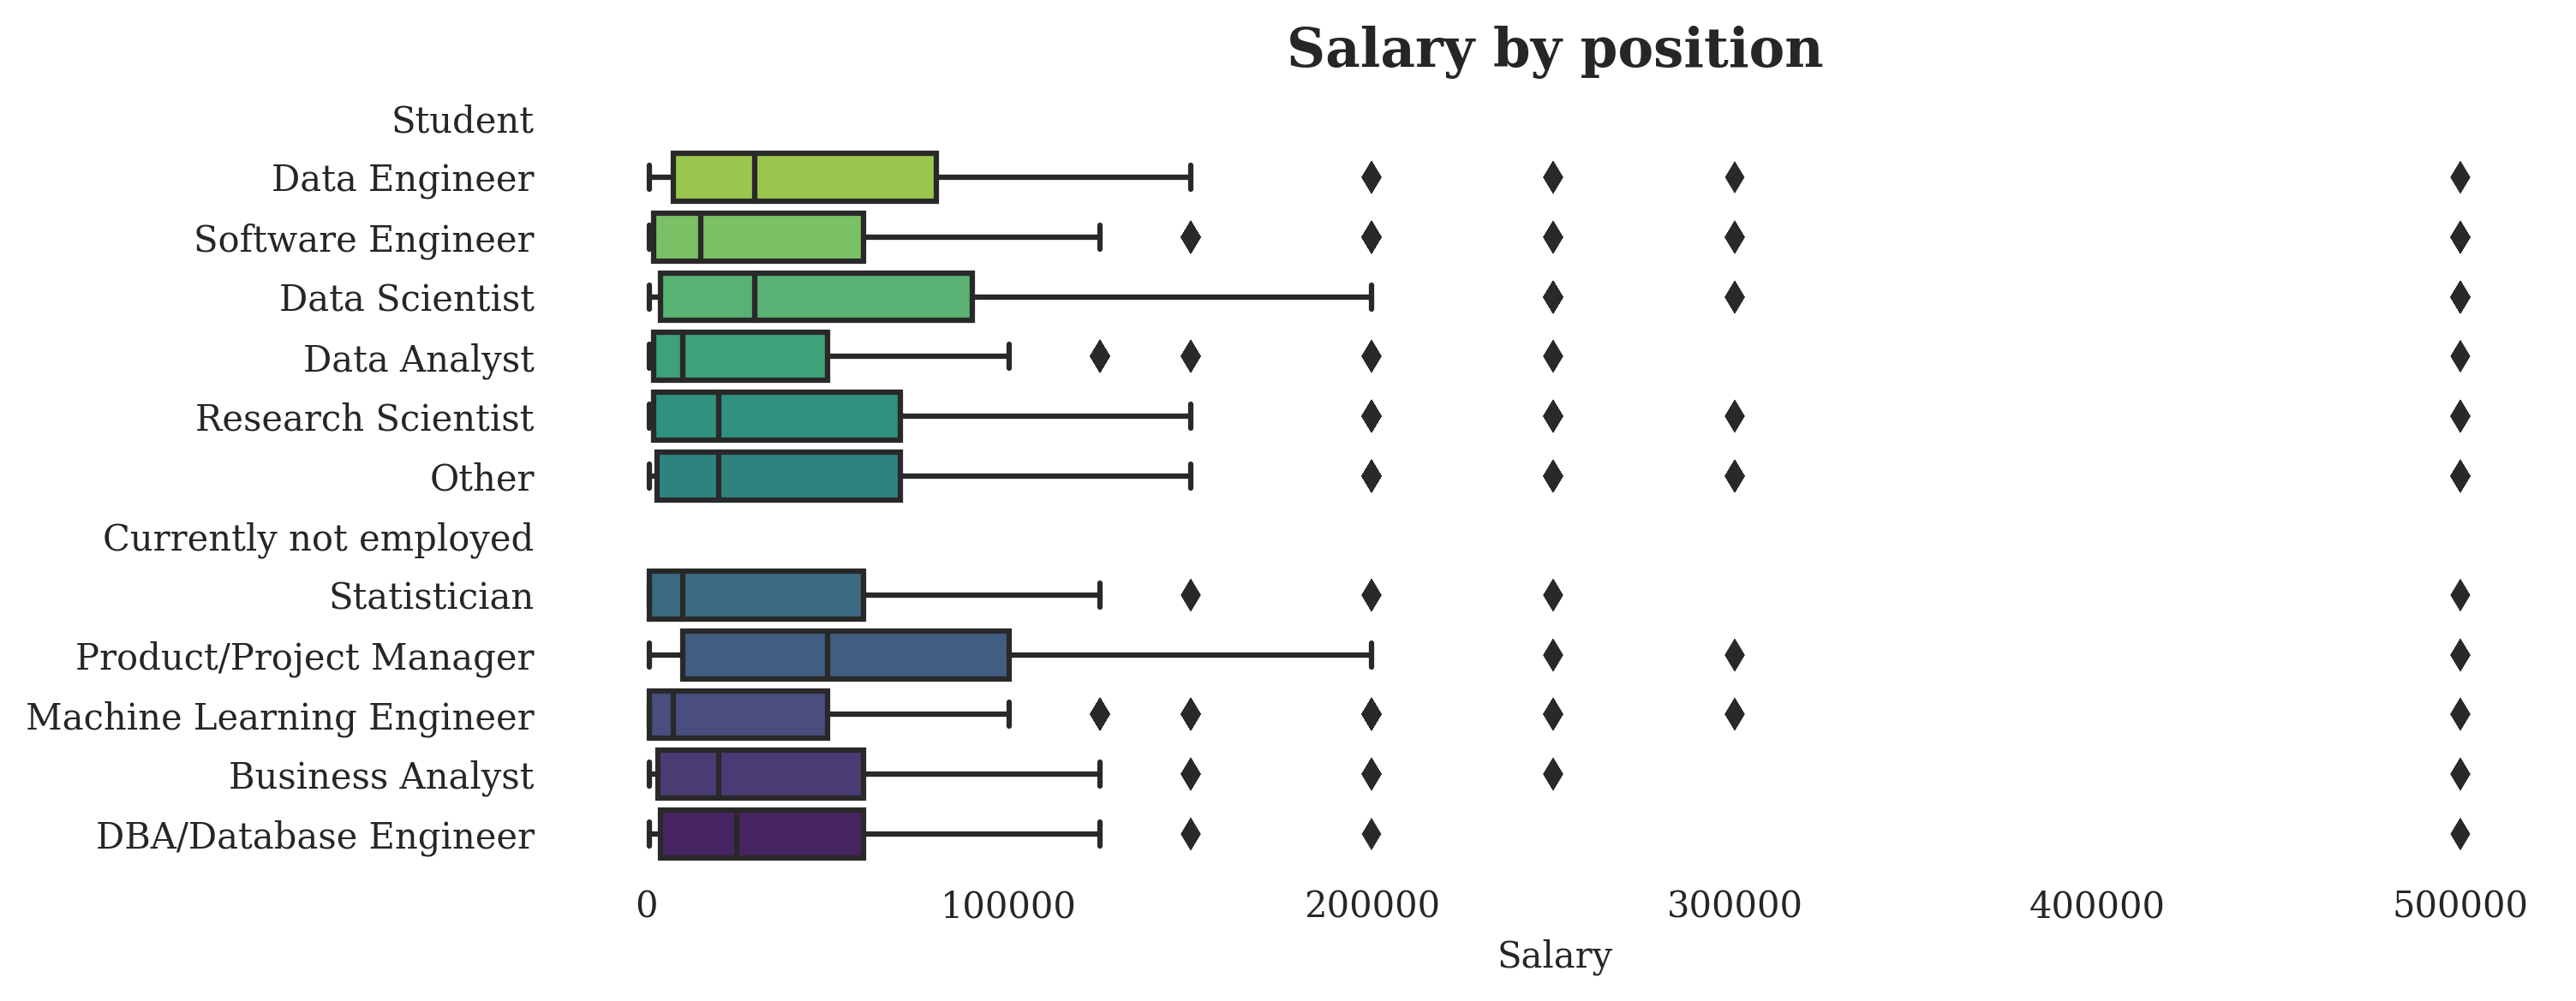

In [17]:
new_df['position'] = df.Q5

vertical_boxplot(new_df.position, 'Salary by position', 'Position')

It looks like the average data analyst's salary is one of the lowest

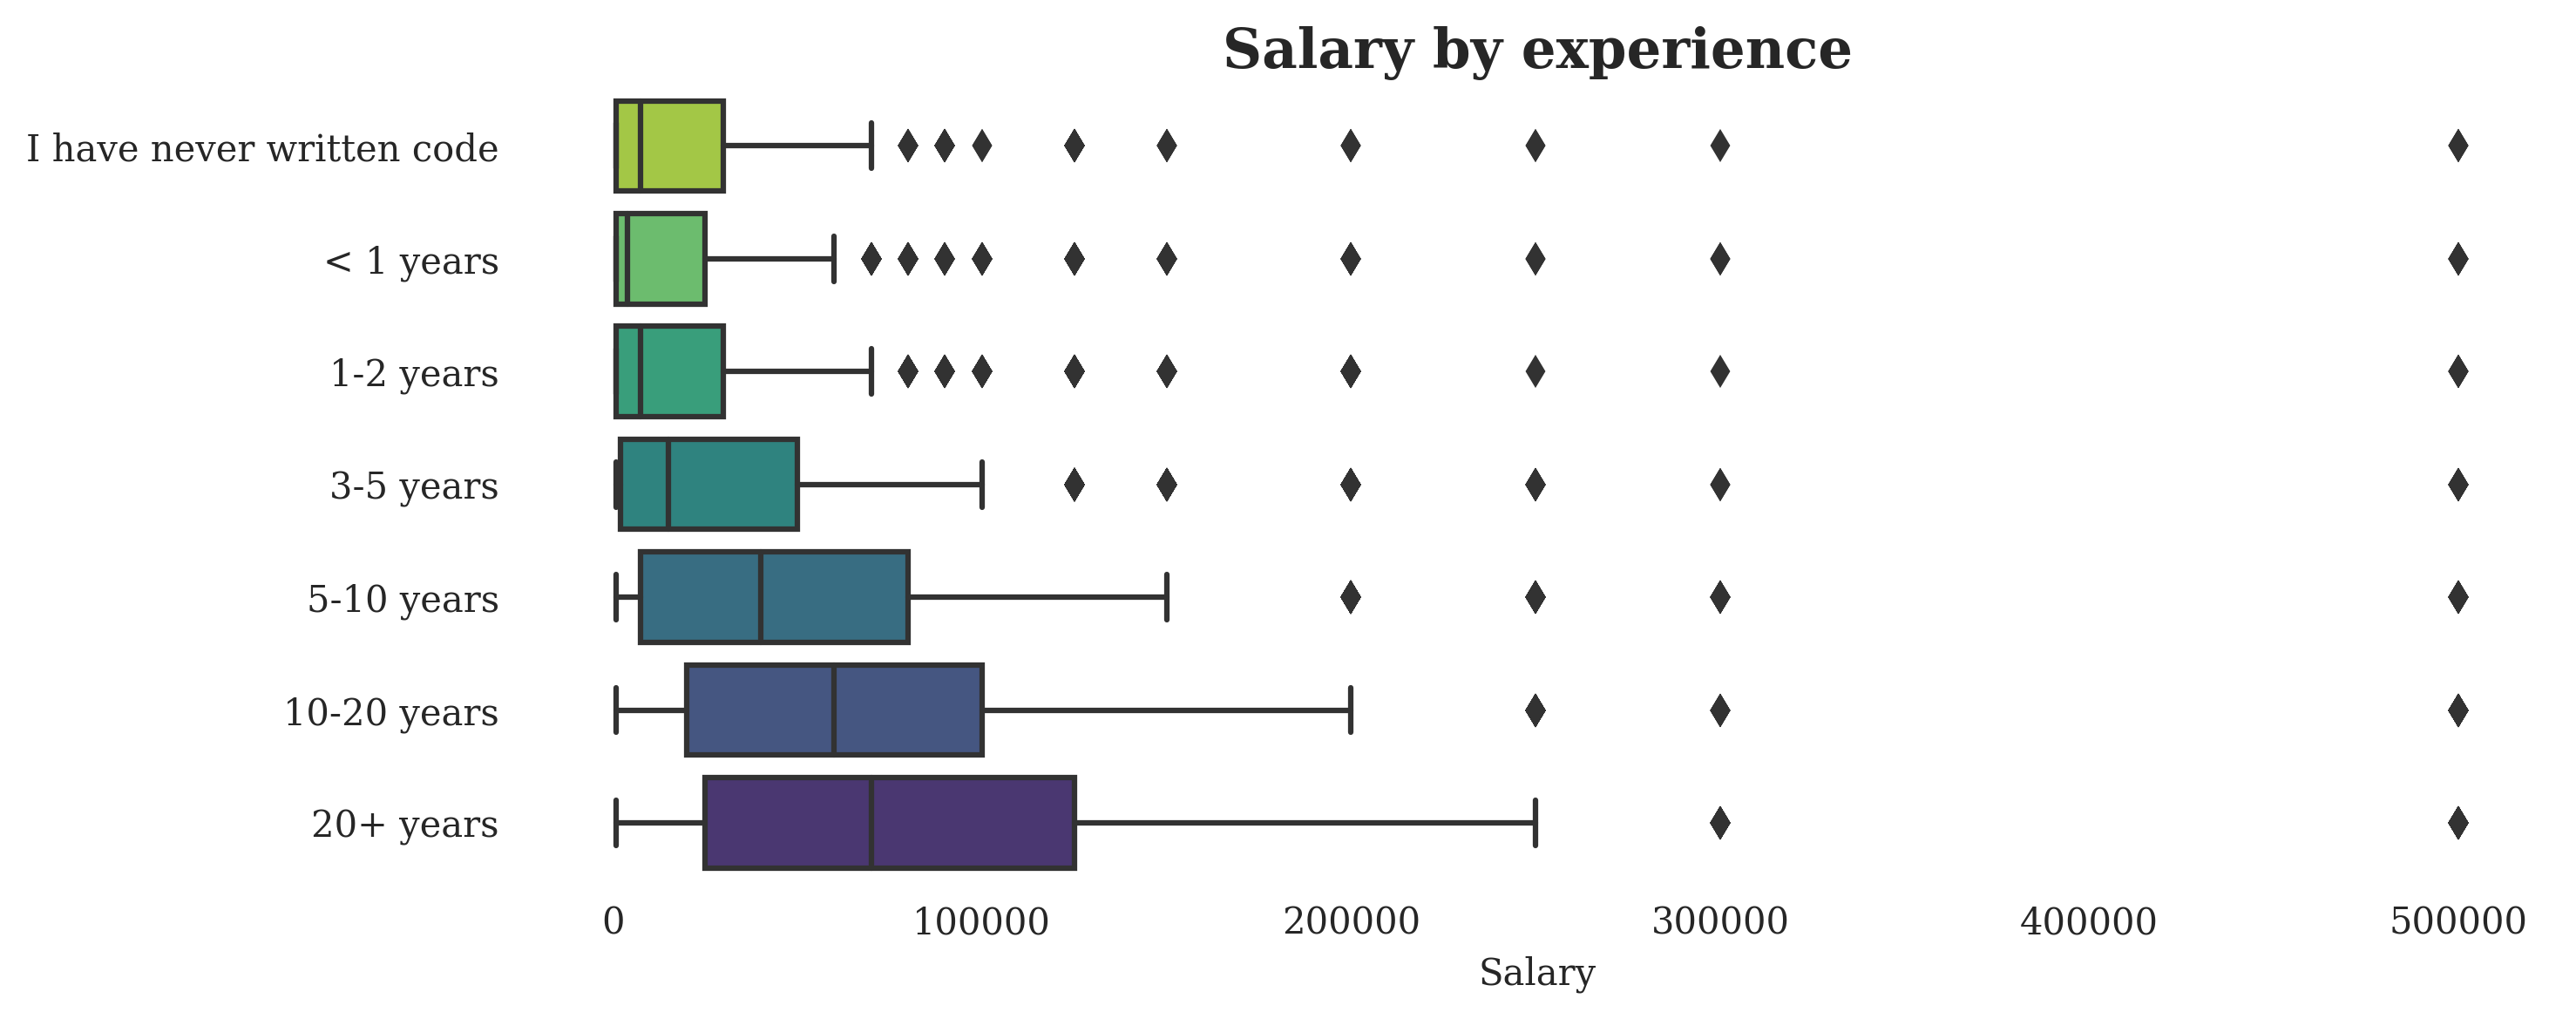

In [18]:
exp_order = ['I have never written code', '< 1 years', '1-2 years', 
             '3-5 years', '5-10 years', '10-20 years', '20+ years']
new_df['experience'] = df.Q6

vertical_boxplot(new_df.experience, 'Salary by experience', 
                 'Experience', order = exp_order)

As with a degree, experience is positively correlated with salary.

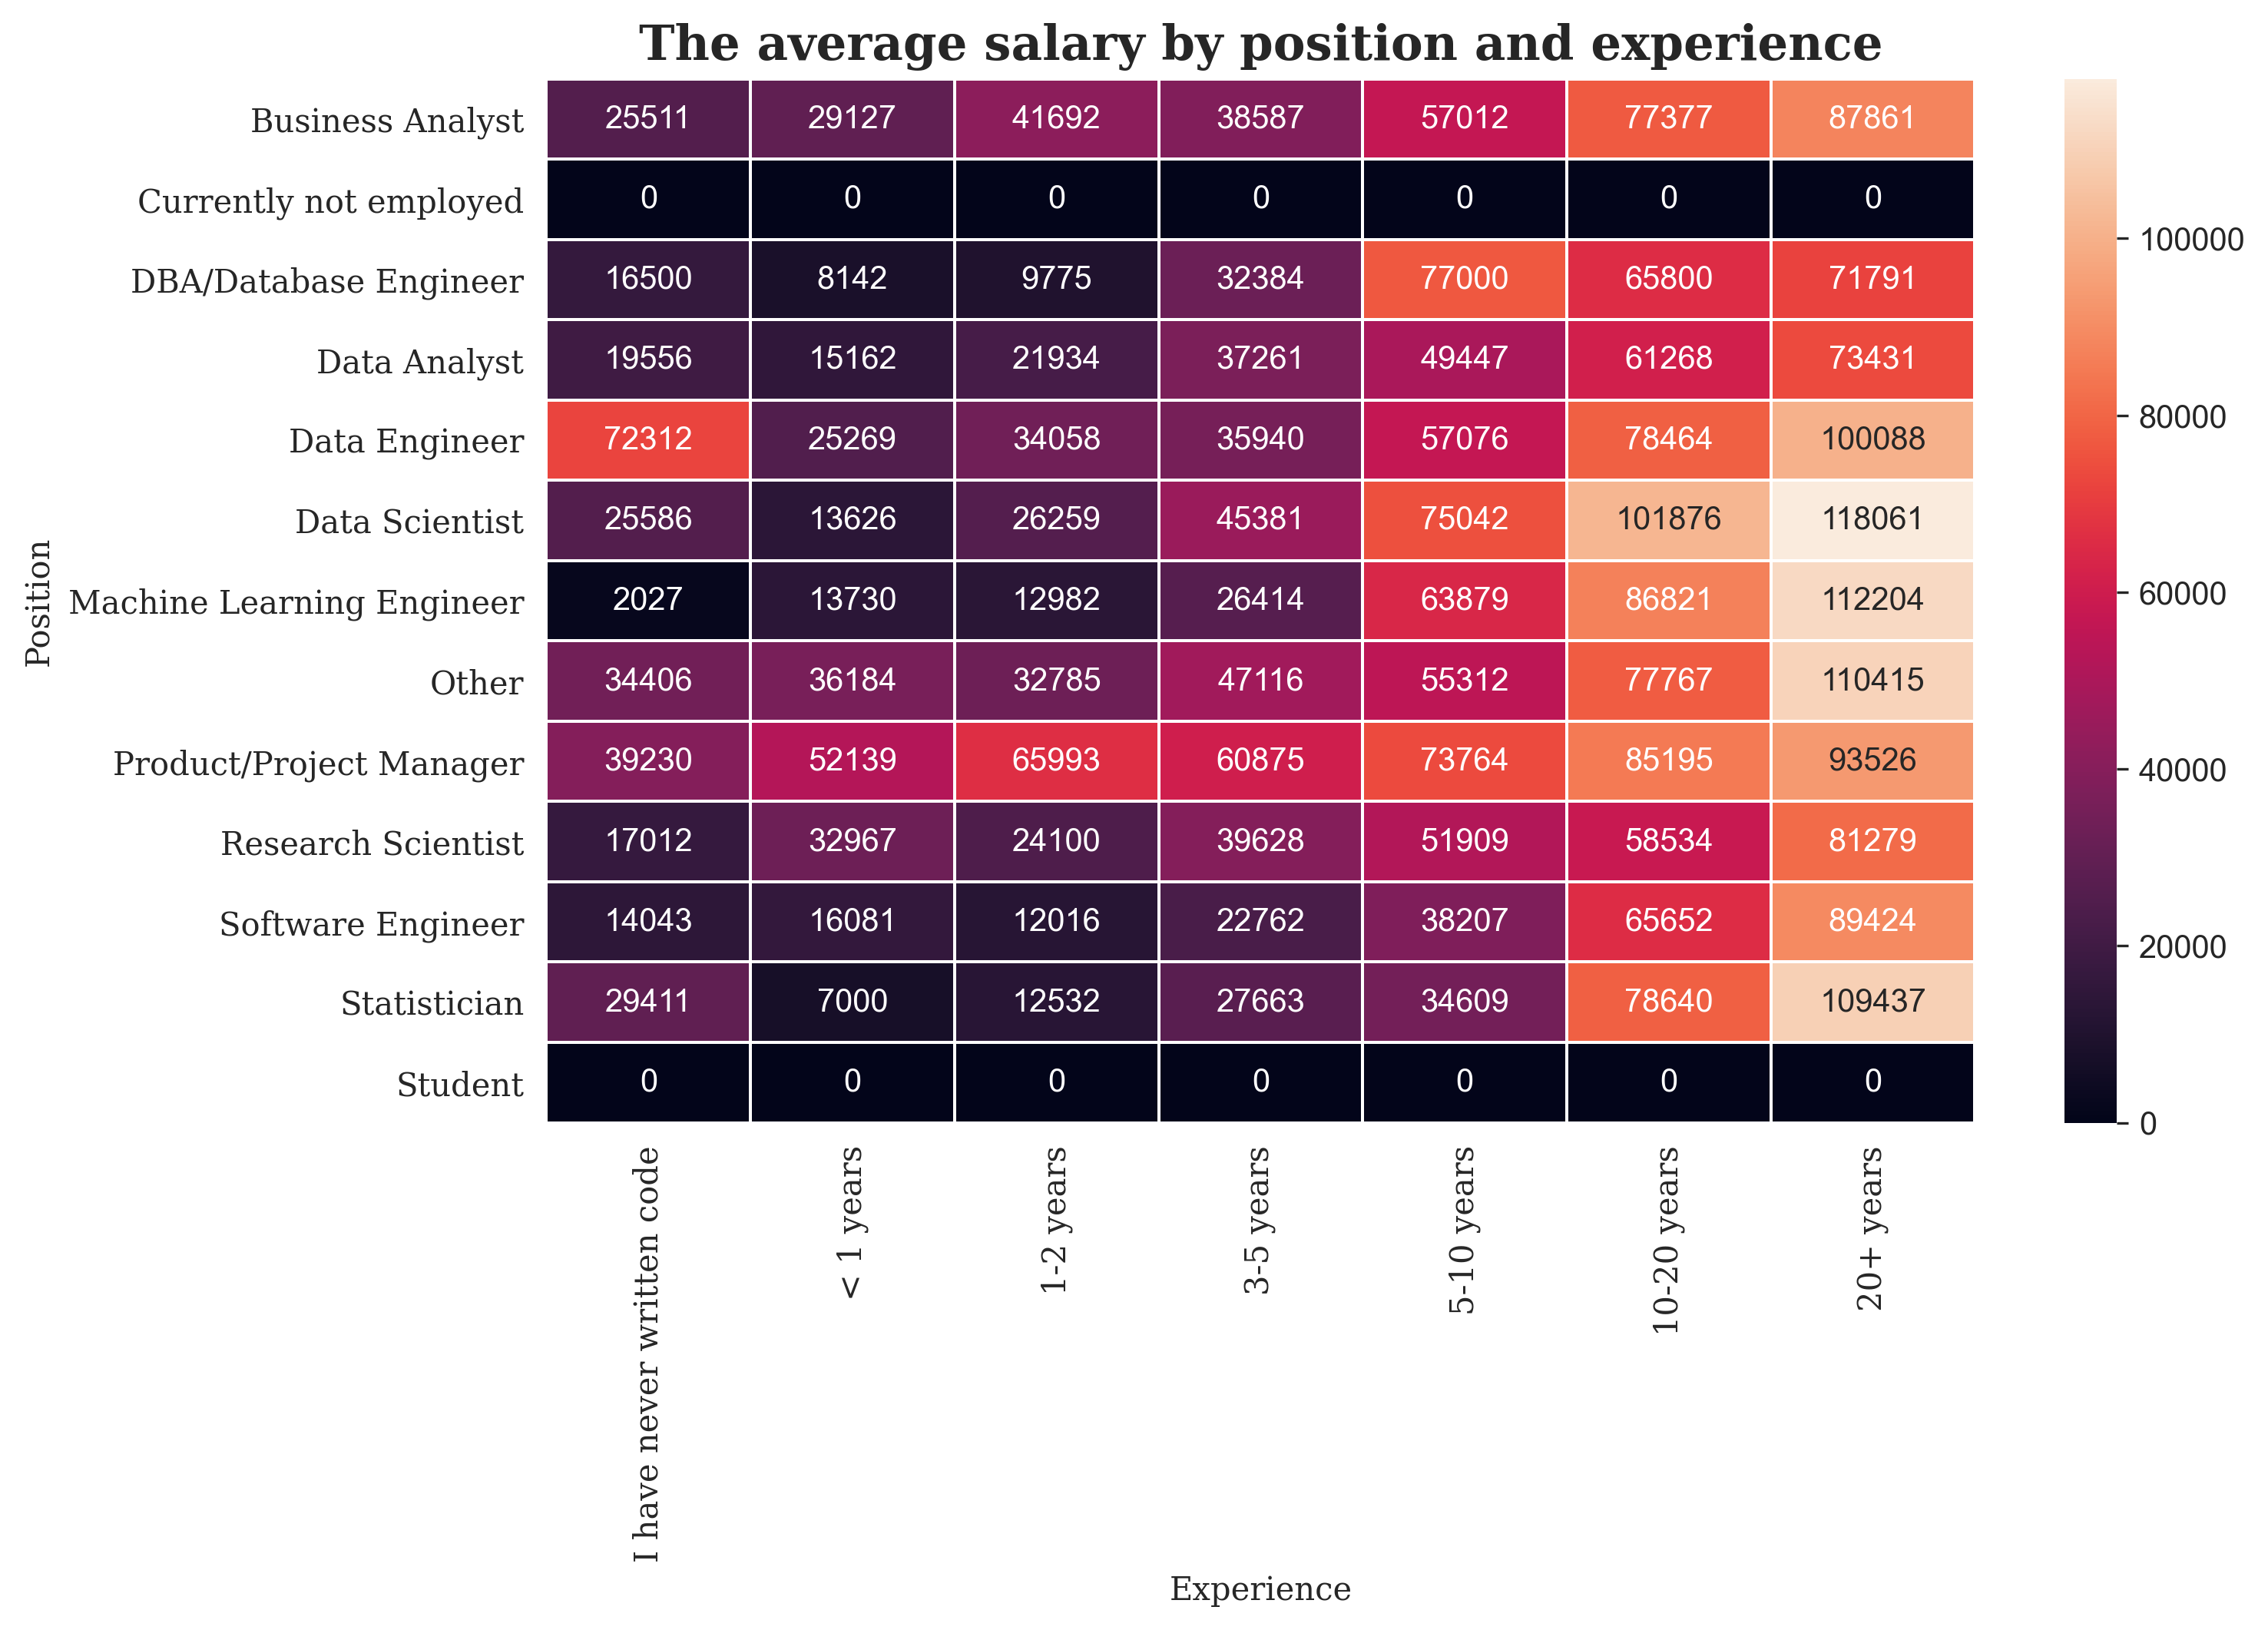

In [22]:
hm = pd.DataFrame(new_df.groupby(['position', 'experience']) \
                  .max_salary.mean()) \
    .reset_index().pivot('position', 'experience', 'max_salary') \
    .fillna(0).astype('int')[exp_order]

plt.figure(figsize=(10, 6))
plt.title('The average salary by position and experience', size = 15, 
          fontweight = 'bold', fontfamily = 'serif')
sns.heatmap(hm, annot = True, fmt = "d", linewidths=.5)
plt.xlabel('Experience', fontfamily = 'serif')
plt.ylabel('Position', fontfamily = 'serif')
plt.xticks(fontfamily = 'serif')
plt.yticks(fontfamily = 'serif')
plt.show()

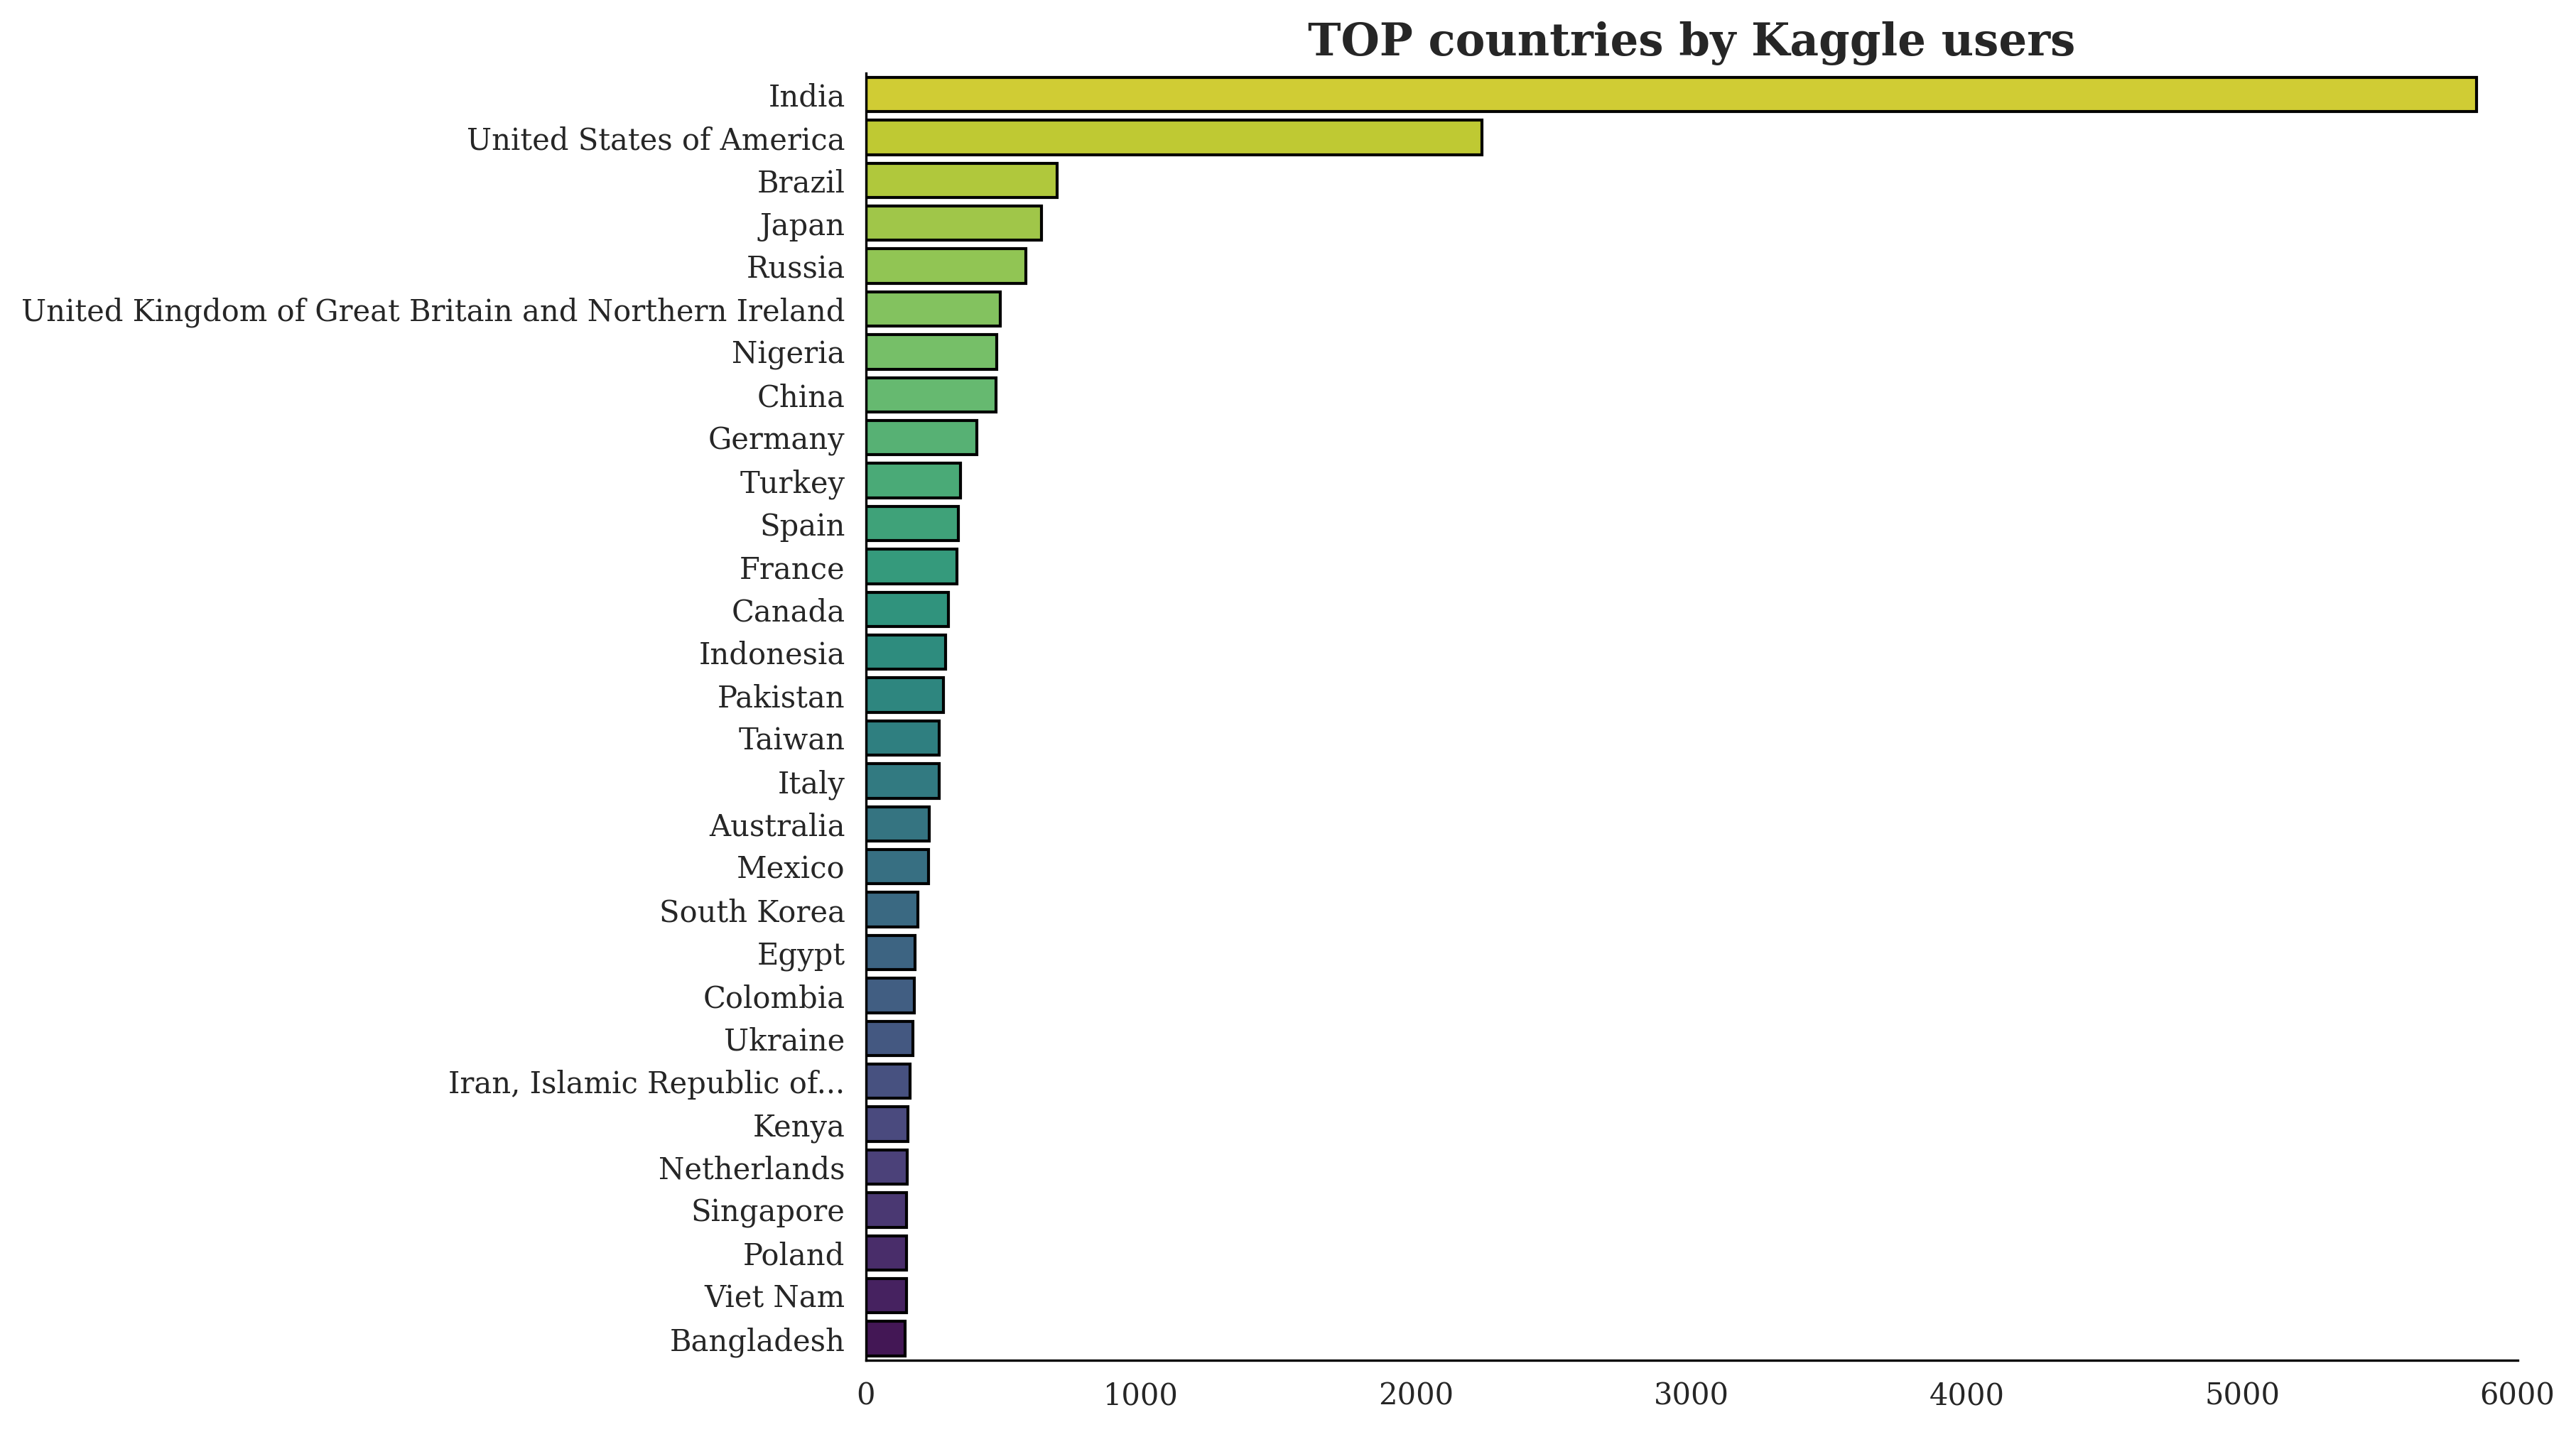

In [23]:
top_countries = df.Q3.value_counts()
top_countries = top_countries[top_countries.index != 'Other'][:30]

bar_plot(x = top_countries, 
         y = top_countries.index,
         title = 'TOP countries by Kaggle users',
         palette_len = top_countries.index, 
         xlim = (0, 6000), 
         xticklabels = range(0, 6001, 1000),
         yticklabels = top_countries.index,
         left_visible = True,
         figsize = (10, 8), axis_grid = 'x')

Let's look at the programming languages that respondents use on a regular basis.

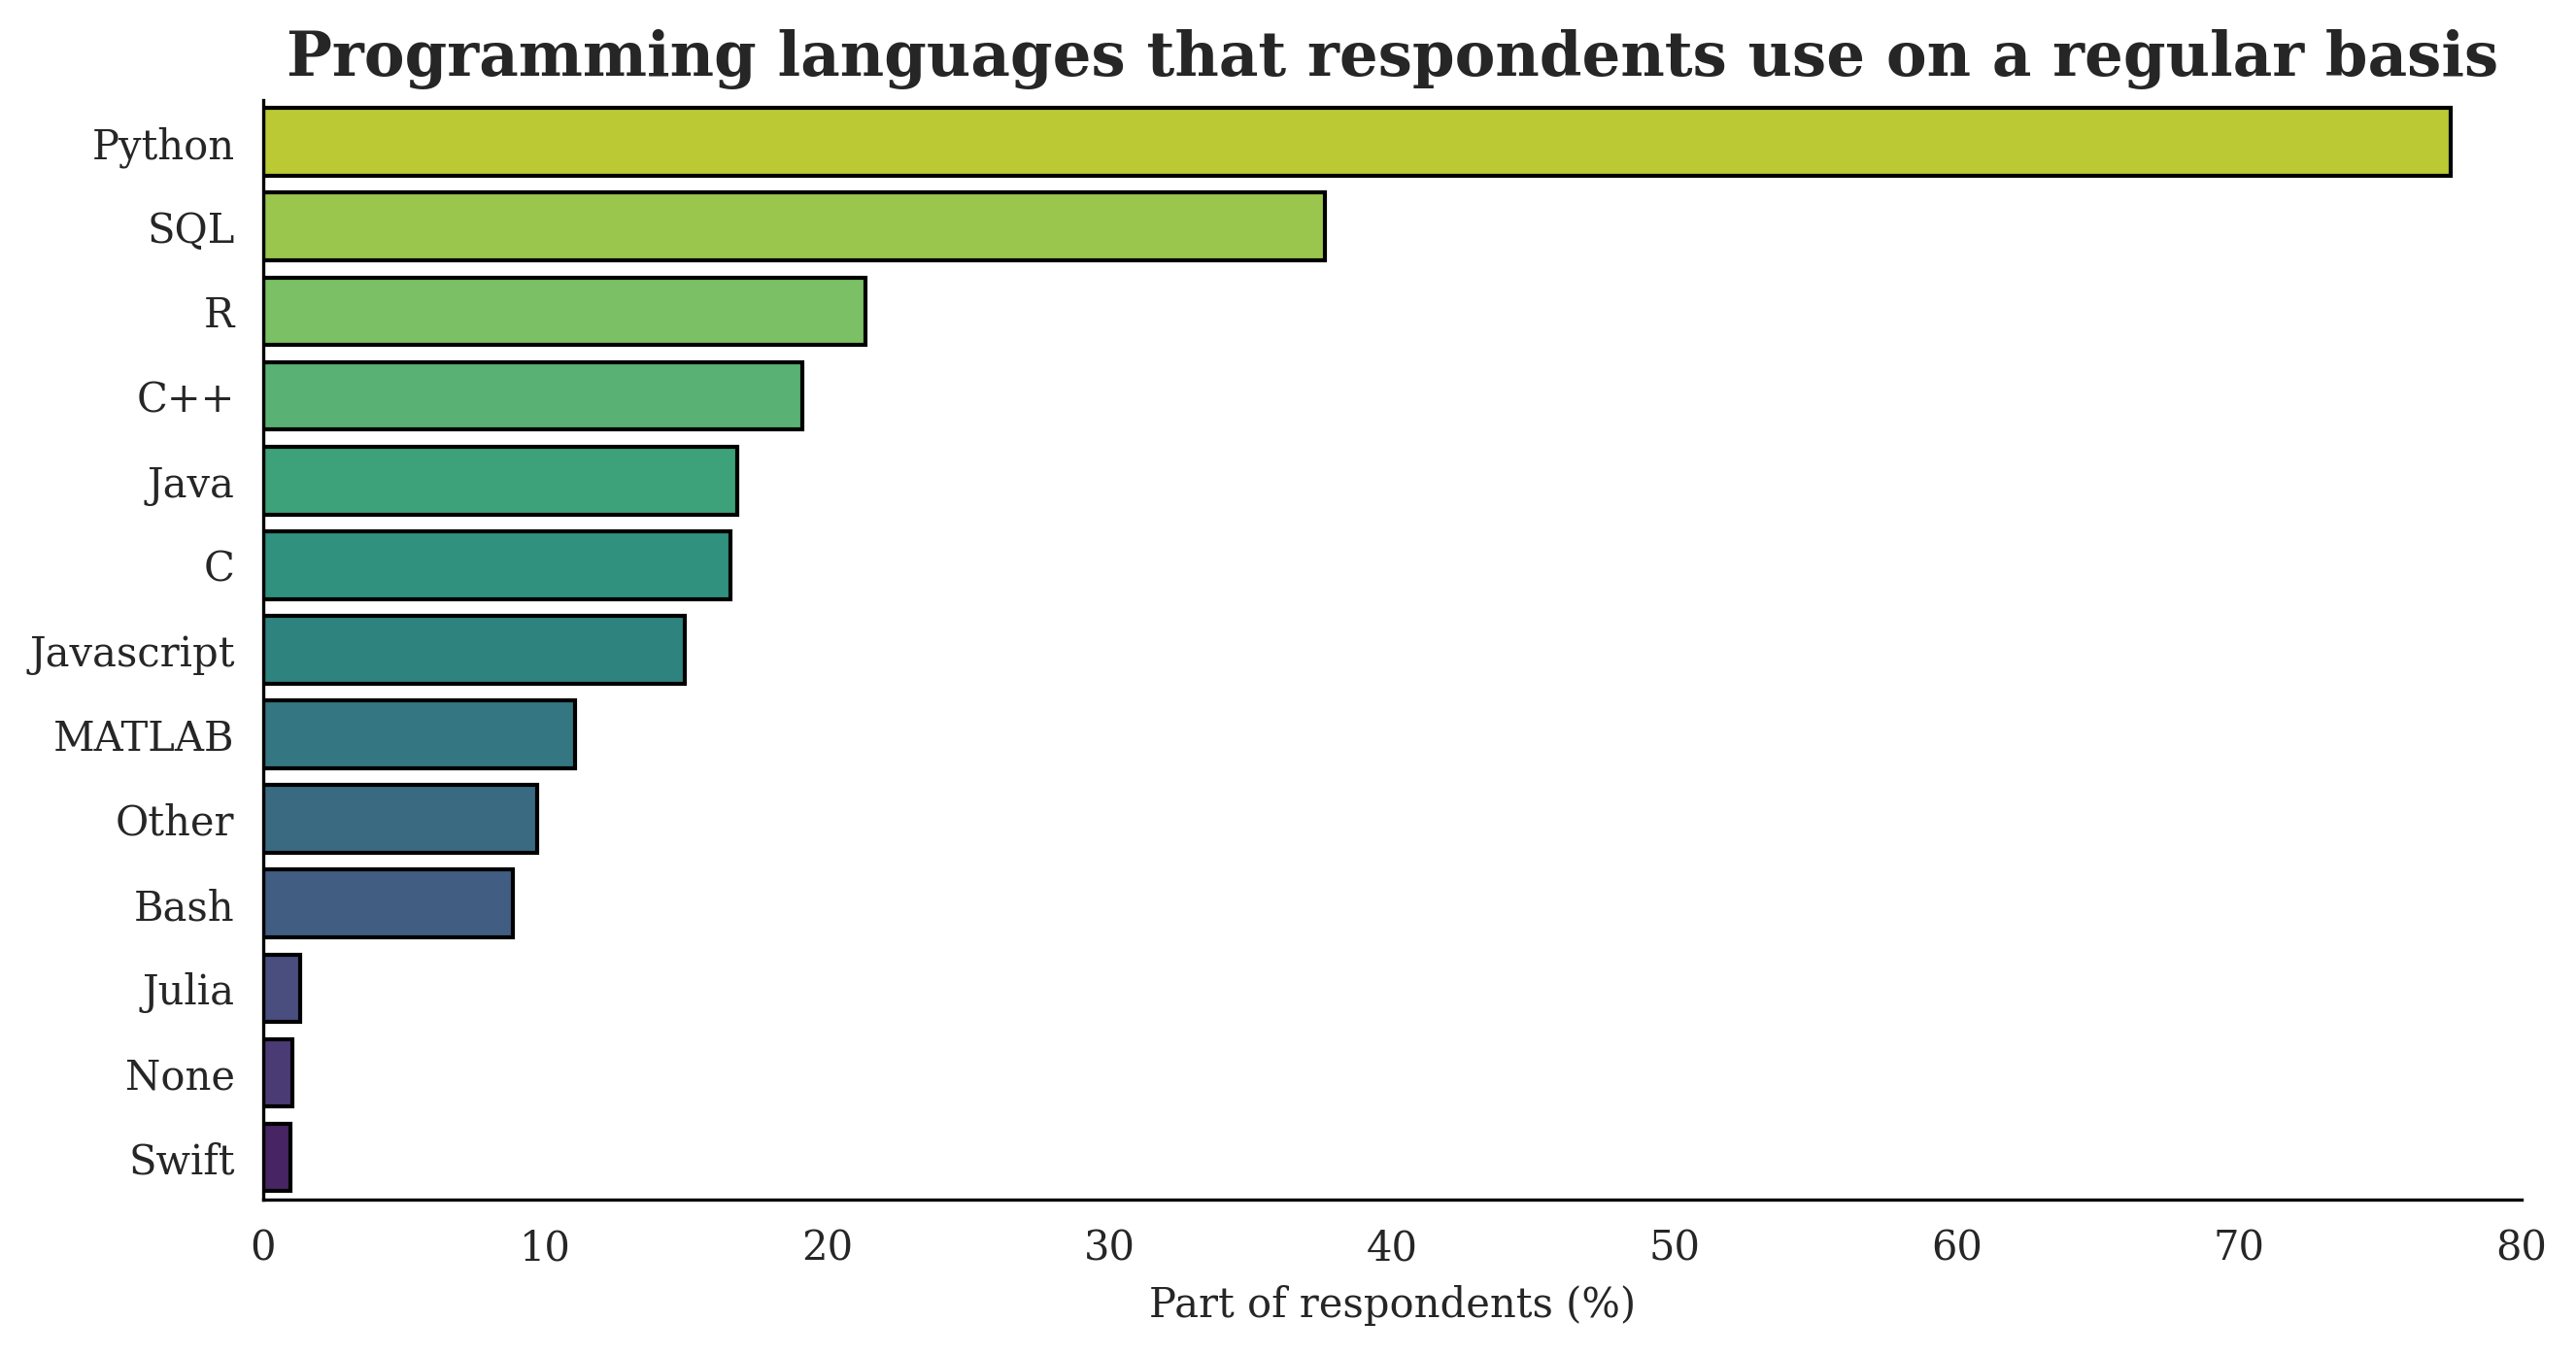

In [24]:
reg_pl = df.iloc[:, 7:20].apply(lambda x: [x.dropna().unique()[0], 
                                           x.count()], axis = 0).T
reg_pl.columns = ['lang', 'count']
reg_pl['perc'] = reg_pl['count'] / len(df) * 100
reg_pl = reg_pl.sort_values('perc', ascending = False)

bar_plot(x = reg_pl.perc, 
         y = reg_pl.lang,
         title = 'Programming languages that respondents use on a regular basis',
         palette_len = reg_pl.lang, 
         xlim = (0, 80), 
         xticklabels = range(0, 81, 10),
         yticklabels = reg_pl.lang,
         left_visible = True, xlabel = 'Part of respondents (%)',
         figsize = (10, 5), axis_grid = 'x')

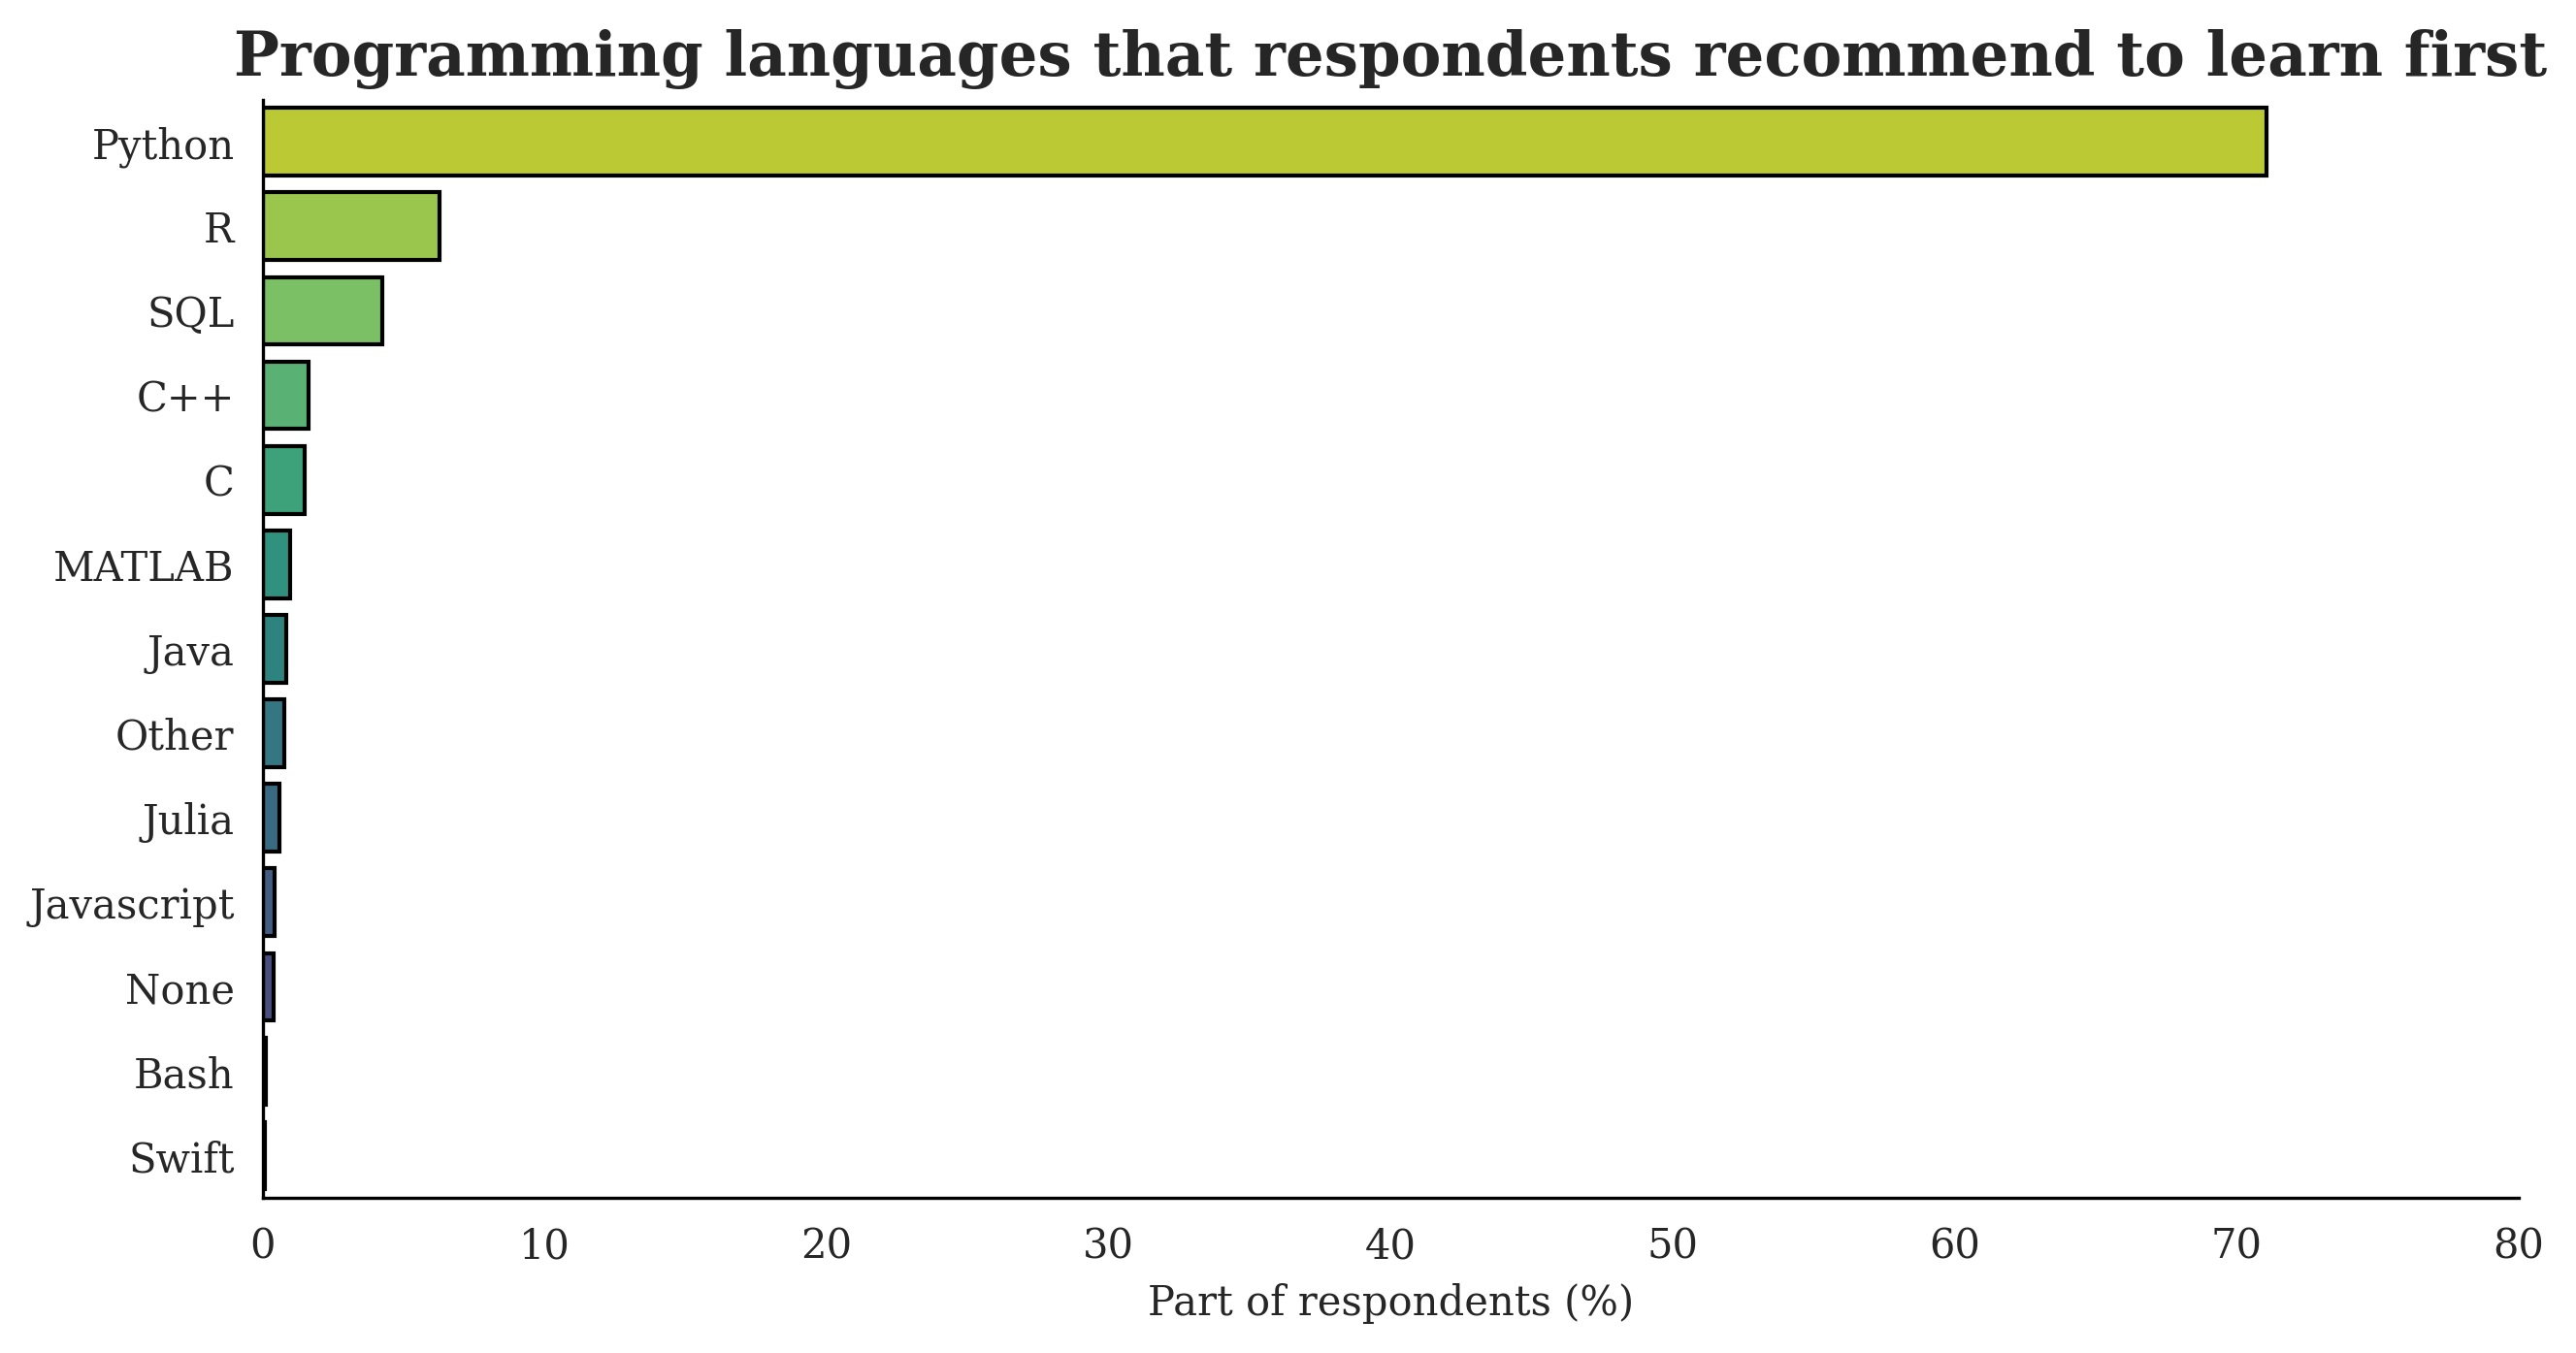

In [25]:
recomend_pl = df.Q8.value_counts().reset_index()
recomend_pl.columns = ['lang', 'count']
recomend_pl['perc'] = recomend_pl['count'] / len(df) * 100
recomend_pl = recomend_pl.sort_values('perc', ascending = False)

bar_plot(x = recomend_pl.perc, 
         y = recomend_pl.lang,
         title = 'Programming languages that respondents recommend to learn first',
         palette_len = recomend_pl.lang, 
         xlim = (0, 80), 
         xticklabels = range(0, 81, 10),
         yticklabels = recomend_pl.lang,
         left_visible = True, xlabel = 'Part of respondents (%)',
         figsize = (10, 5), axis_grid = 'x')

As expected, Python is the best programming language :)

# 2018-2020: changes in relations

Now, we'll look at time changes in some relations.

In [26]:
df_2018 = data_2018.drop(0, axis = 0)
df_2019 = data_2019.drop(0, axis = 0)

df_2018['year'] = '2018'
df_2019['year'] = '2019'
df['year'] = '2020'

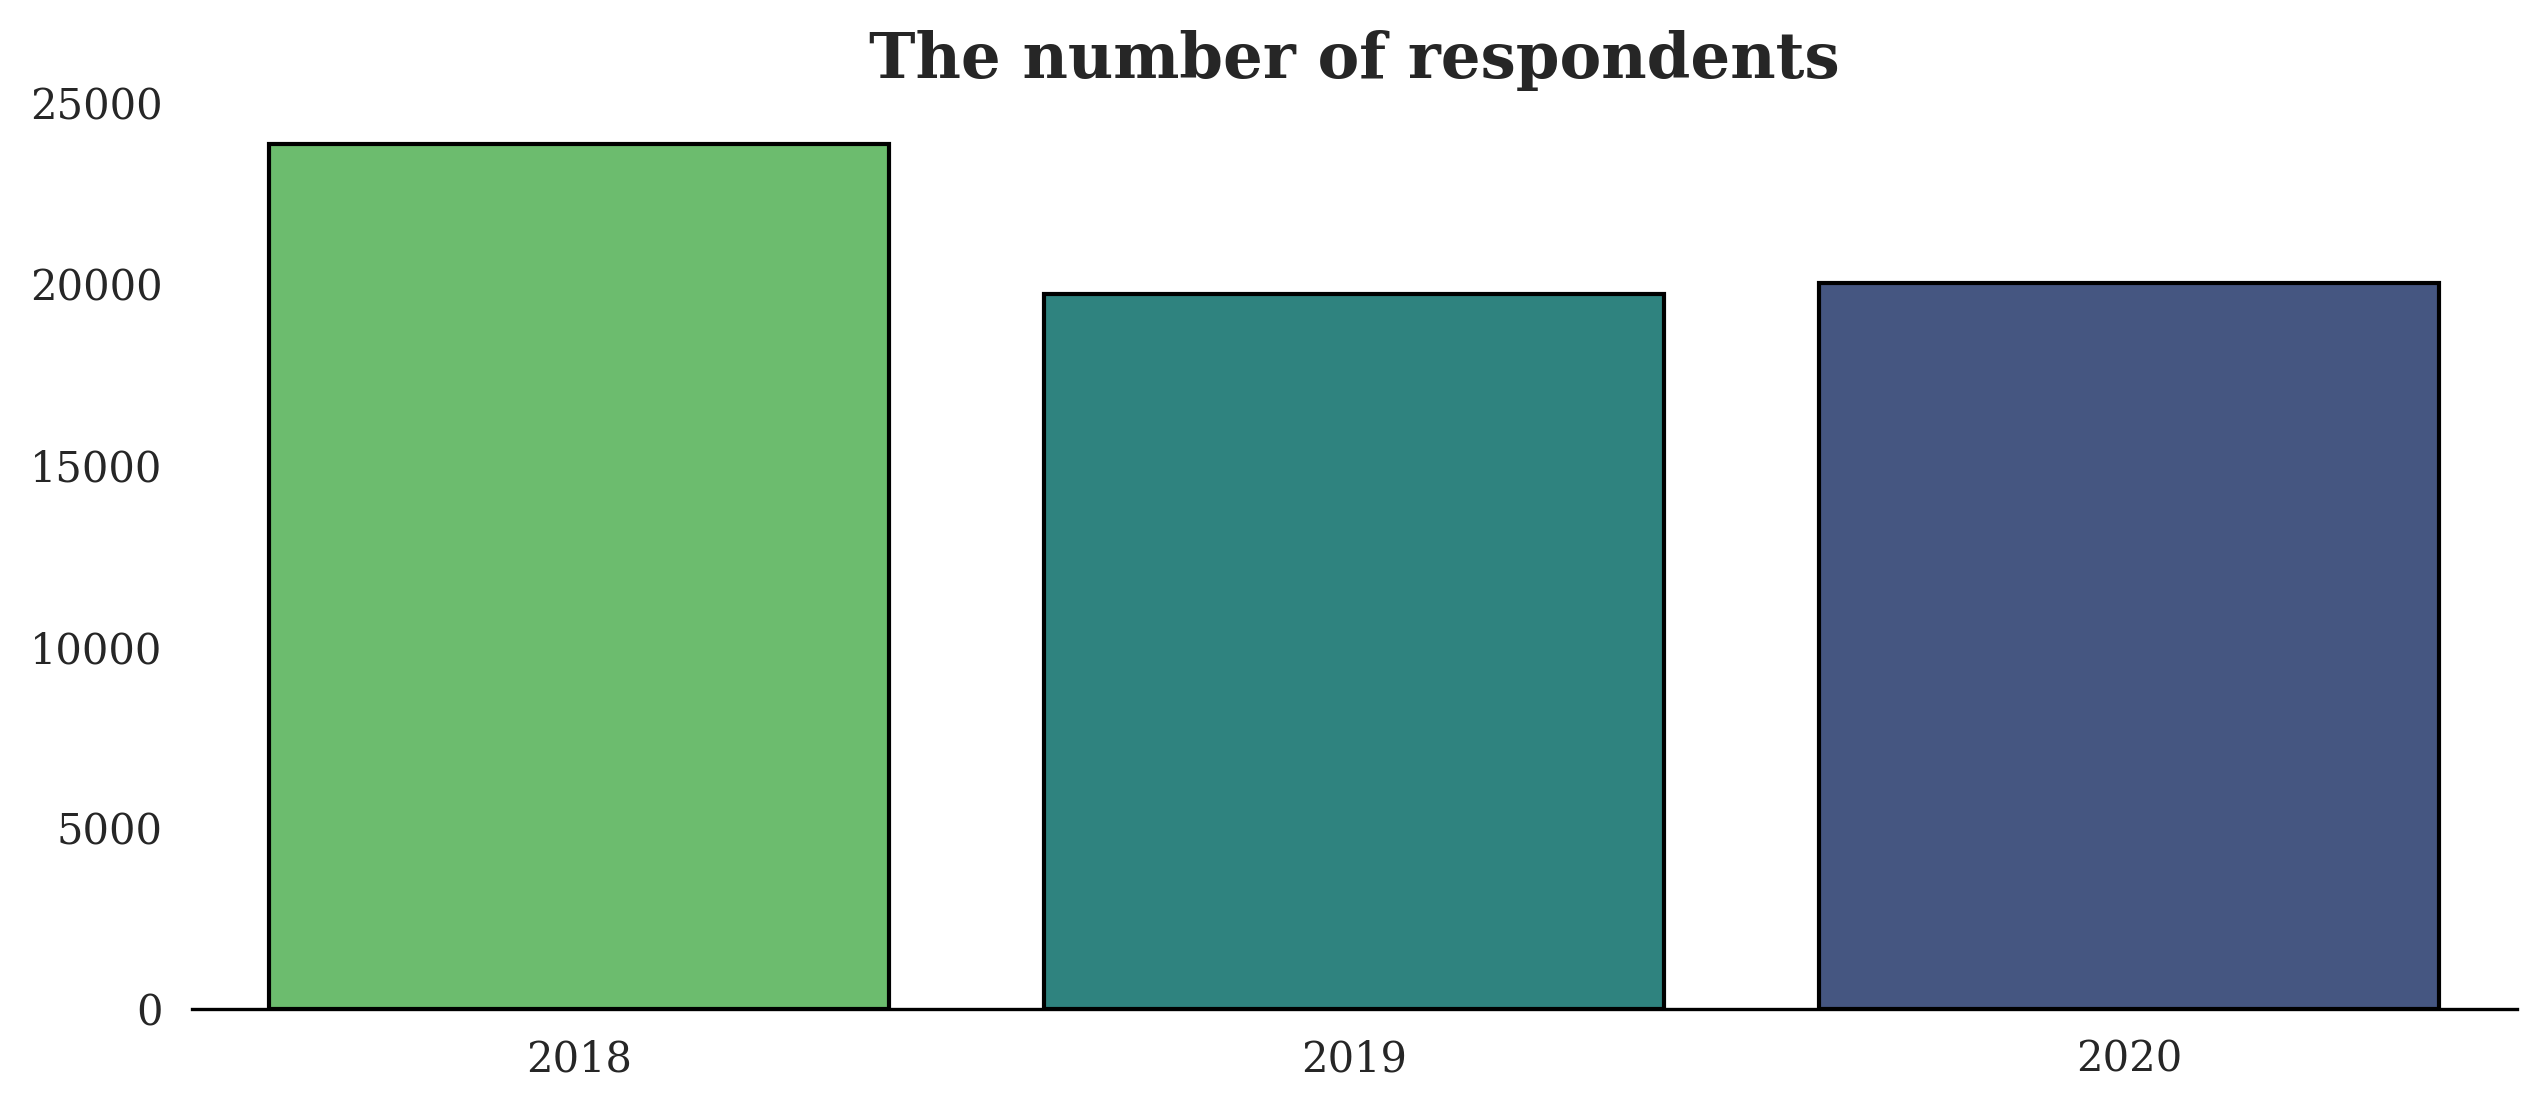

In [27]:
df_all = pd.DataFrame({'year': [2018, 2019, 2020], 
                       'respondents': [len(df_2018), 
                                       len(df_2019), len(df)]})

bar_plot(x = df_all.year, 
         y = df_all.respondents,
         title = 'The number of respondents',
         palette_len = df_all, 
         ylim = (0, 25000), 
         xticklabels = df_all.year,
         yticklabels = range(0, 25001, 5000))

In [55]:
def age_data_ch(data):
    if data.iloc[:, 1].dtype == 'object':
        data.columns = ['sex', 'age', 'count']
        data.age = data.age.apply(lambda x: x.split("-")[0])
        data.age = data.age.apply(lambda x: x.replace('+', '')).astype('int')
    else: 
        data.columns = ['sex', 'age', 'count']
        data.age = data.age.astype('int')
    return data

sex_2018 = age_data_ch(df_2018[['Q1', 'Q2']].value_counts().reset_index())
sex_2019 = age_data_ch(df_2019[['Q2', 'Q1']].value_counts().reset_index())
sex_2020 = age_data_ch(df[['Q2', 'Q1']].value_counts().reset_index())

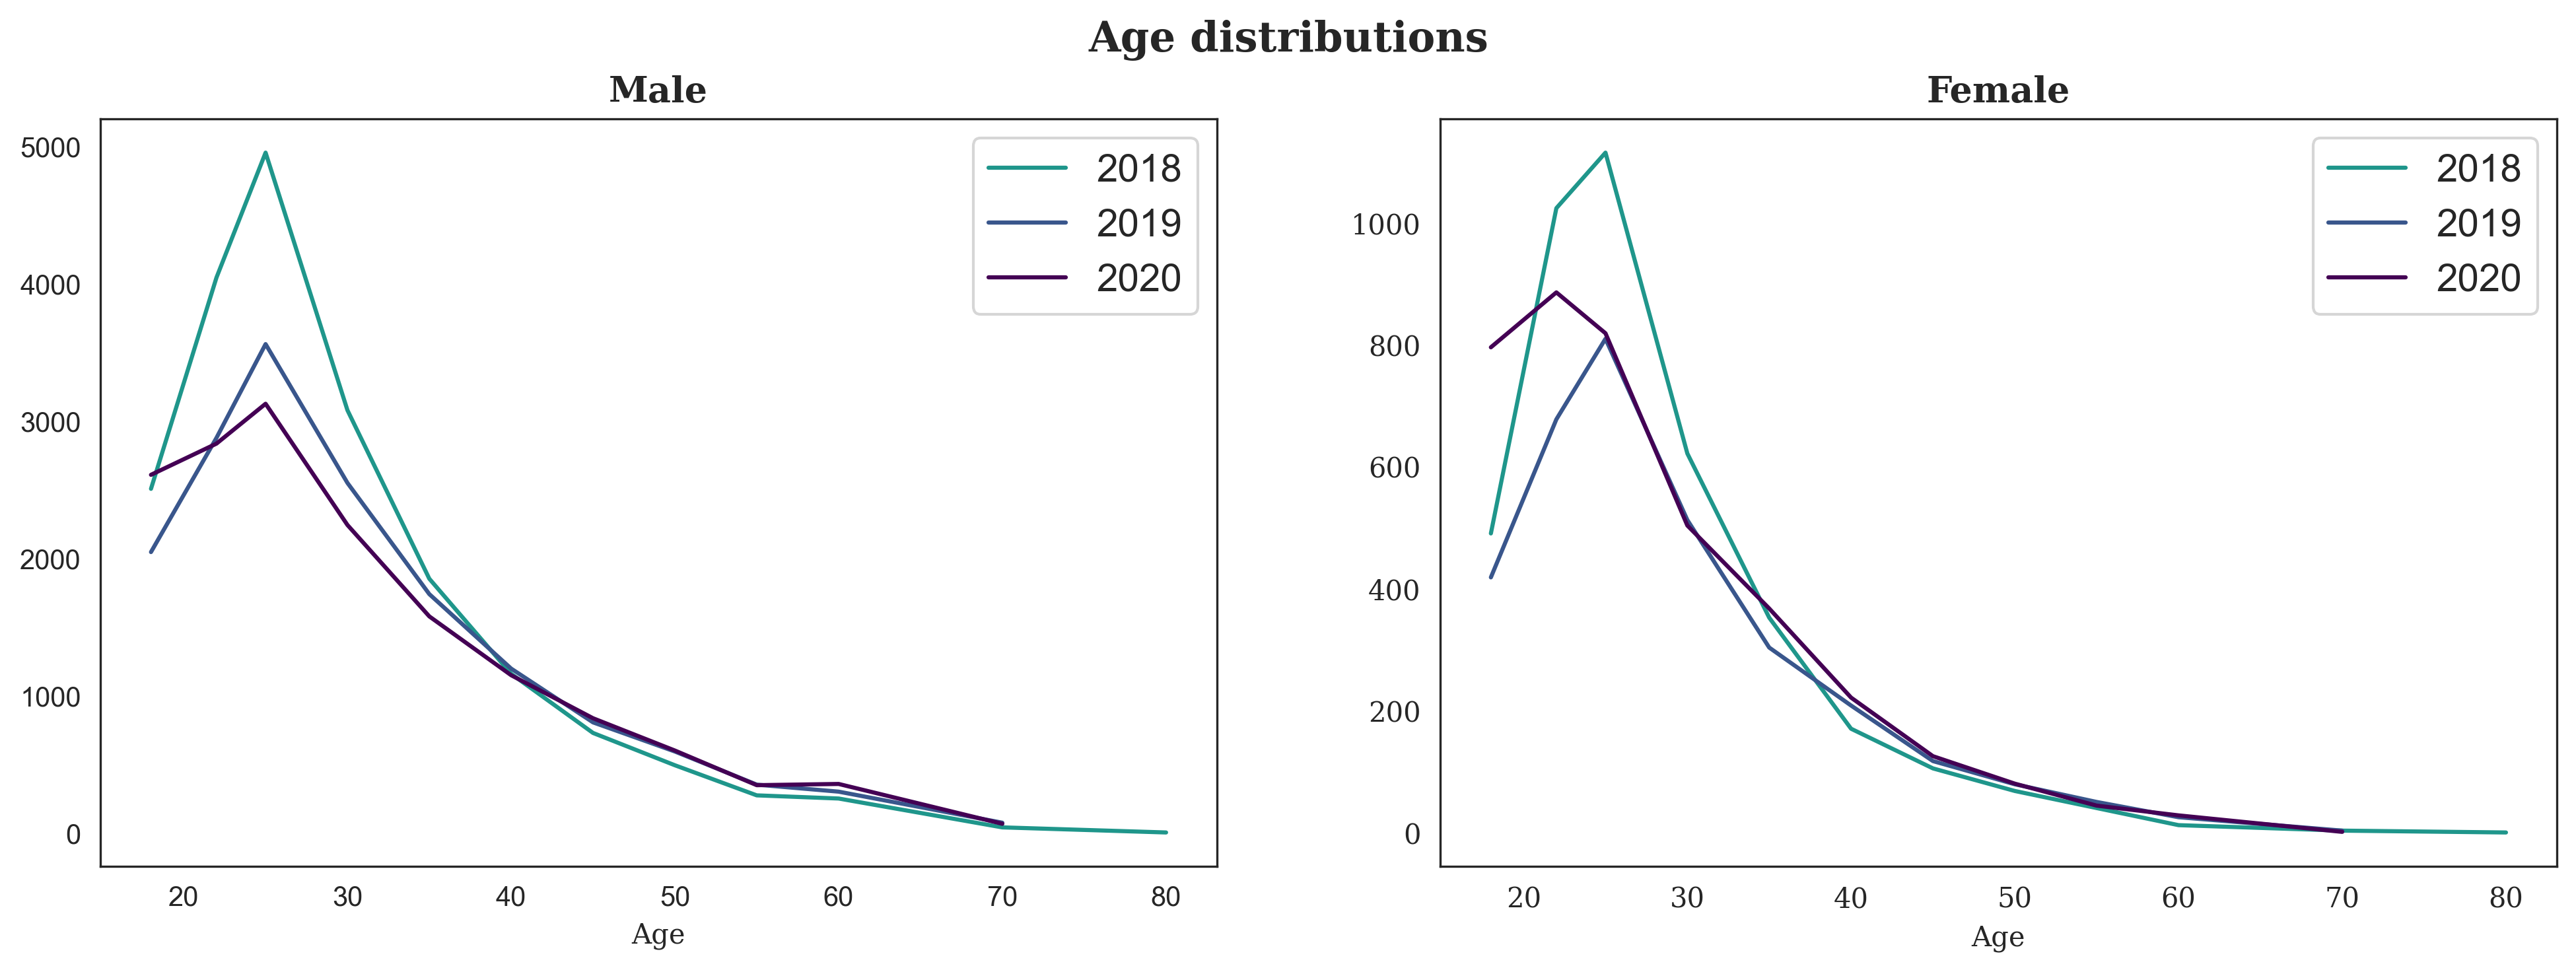

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
sns.set_style("white")
plt.suptitle('Age distributions', size = 15, 
             fontweight = 'bold', fontfamily = 'serif')

sns.lineplot(data = sex_2018[sex_2018.sex == "Male"], x = 'age', y = 'count',
            color = '#1F968BFF', label = '2018', ax = ax1)
sns.lineplot(data = sex_2019[sex_2019.sex == "Male"], x = 'age', y = 'count',
            color = '#39568CFF', label = '2019', ax = ax1)
sns.lineplot(data = sex_2020[sex_2020.sex == "Man"], x = 'age', y = 'count',
            color = '#440154FF', label = '2020', ax = ax1)
ax1.set_title('Male', size = 13, fontweight = 'bold', fontfamily = 'serif')
ax1.legend(prop={'size': 14})
ax1.set_xlabel('Age', fontfamily = 'serif')
ax1.set_ylabel('')
plt.xticks(fontfamily = 'serif')
plt.yticks(fontfamily = 'serif')

sns.lineplot(data = sex_2018[sex_2018.sex == "Female"], x = 'age', y = 'count',
            color = '#1F968BFF', label = '2018', ax = ax2)
sns.lineplot(data = sex_2019[sex_2019.sex == "Female"], x = 'age', y = 'count',
            color = '#39568CFF', label = '2019', ax = ax2)
sns.lineplot(data = sex_2020[sex_2020.sex == "Woman"], x = 'age', y = 'count',
            color = '#440154FF', label = '2020', ax = ax2)
ax2.set_title('Female', size = 13, fontweight = 'bold', fontfamily = 'serif')
ax2.legend(prop={'size': 14})
ax2.set_xlabel('Age', fontfamily = 'serif')
ax2.set_ylabel('')
plt.xticks(fontfamily = 'serif')
plt.yticks(fontfamily = 'serif')

plt.show()

In [49]:
def lang_func(data, year):
    reg_pl = data.apply(lambda x: [x.dropna().unique()[0], 
                                   x.count()], axis = 0).T
    reg_pl.columns = ['lang', 'count']
    reg_pl['perc'] = reg_pl['count'] / len(df) * 100
    reg_pl = reg_pl.sort_values('perc', ascending = False)
    reg_pl['year'] = year
    return reg_pl

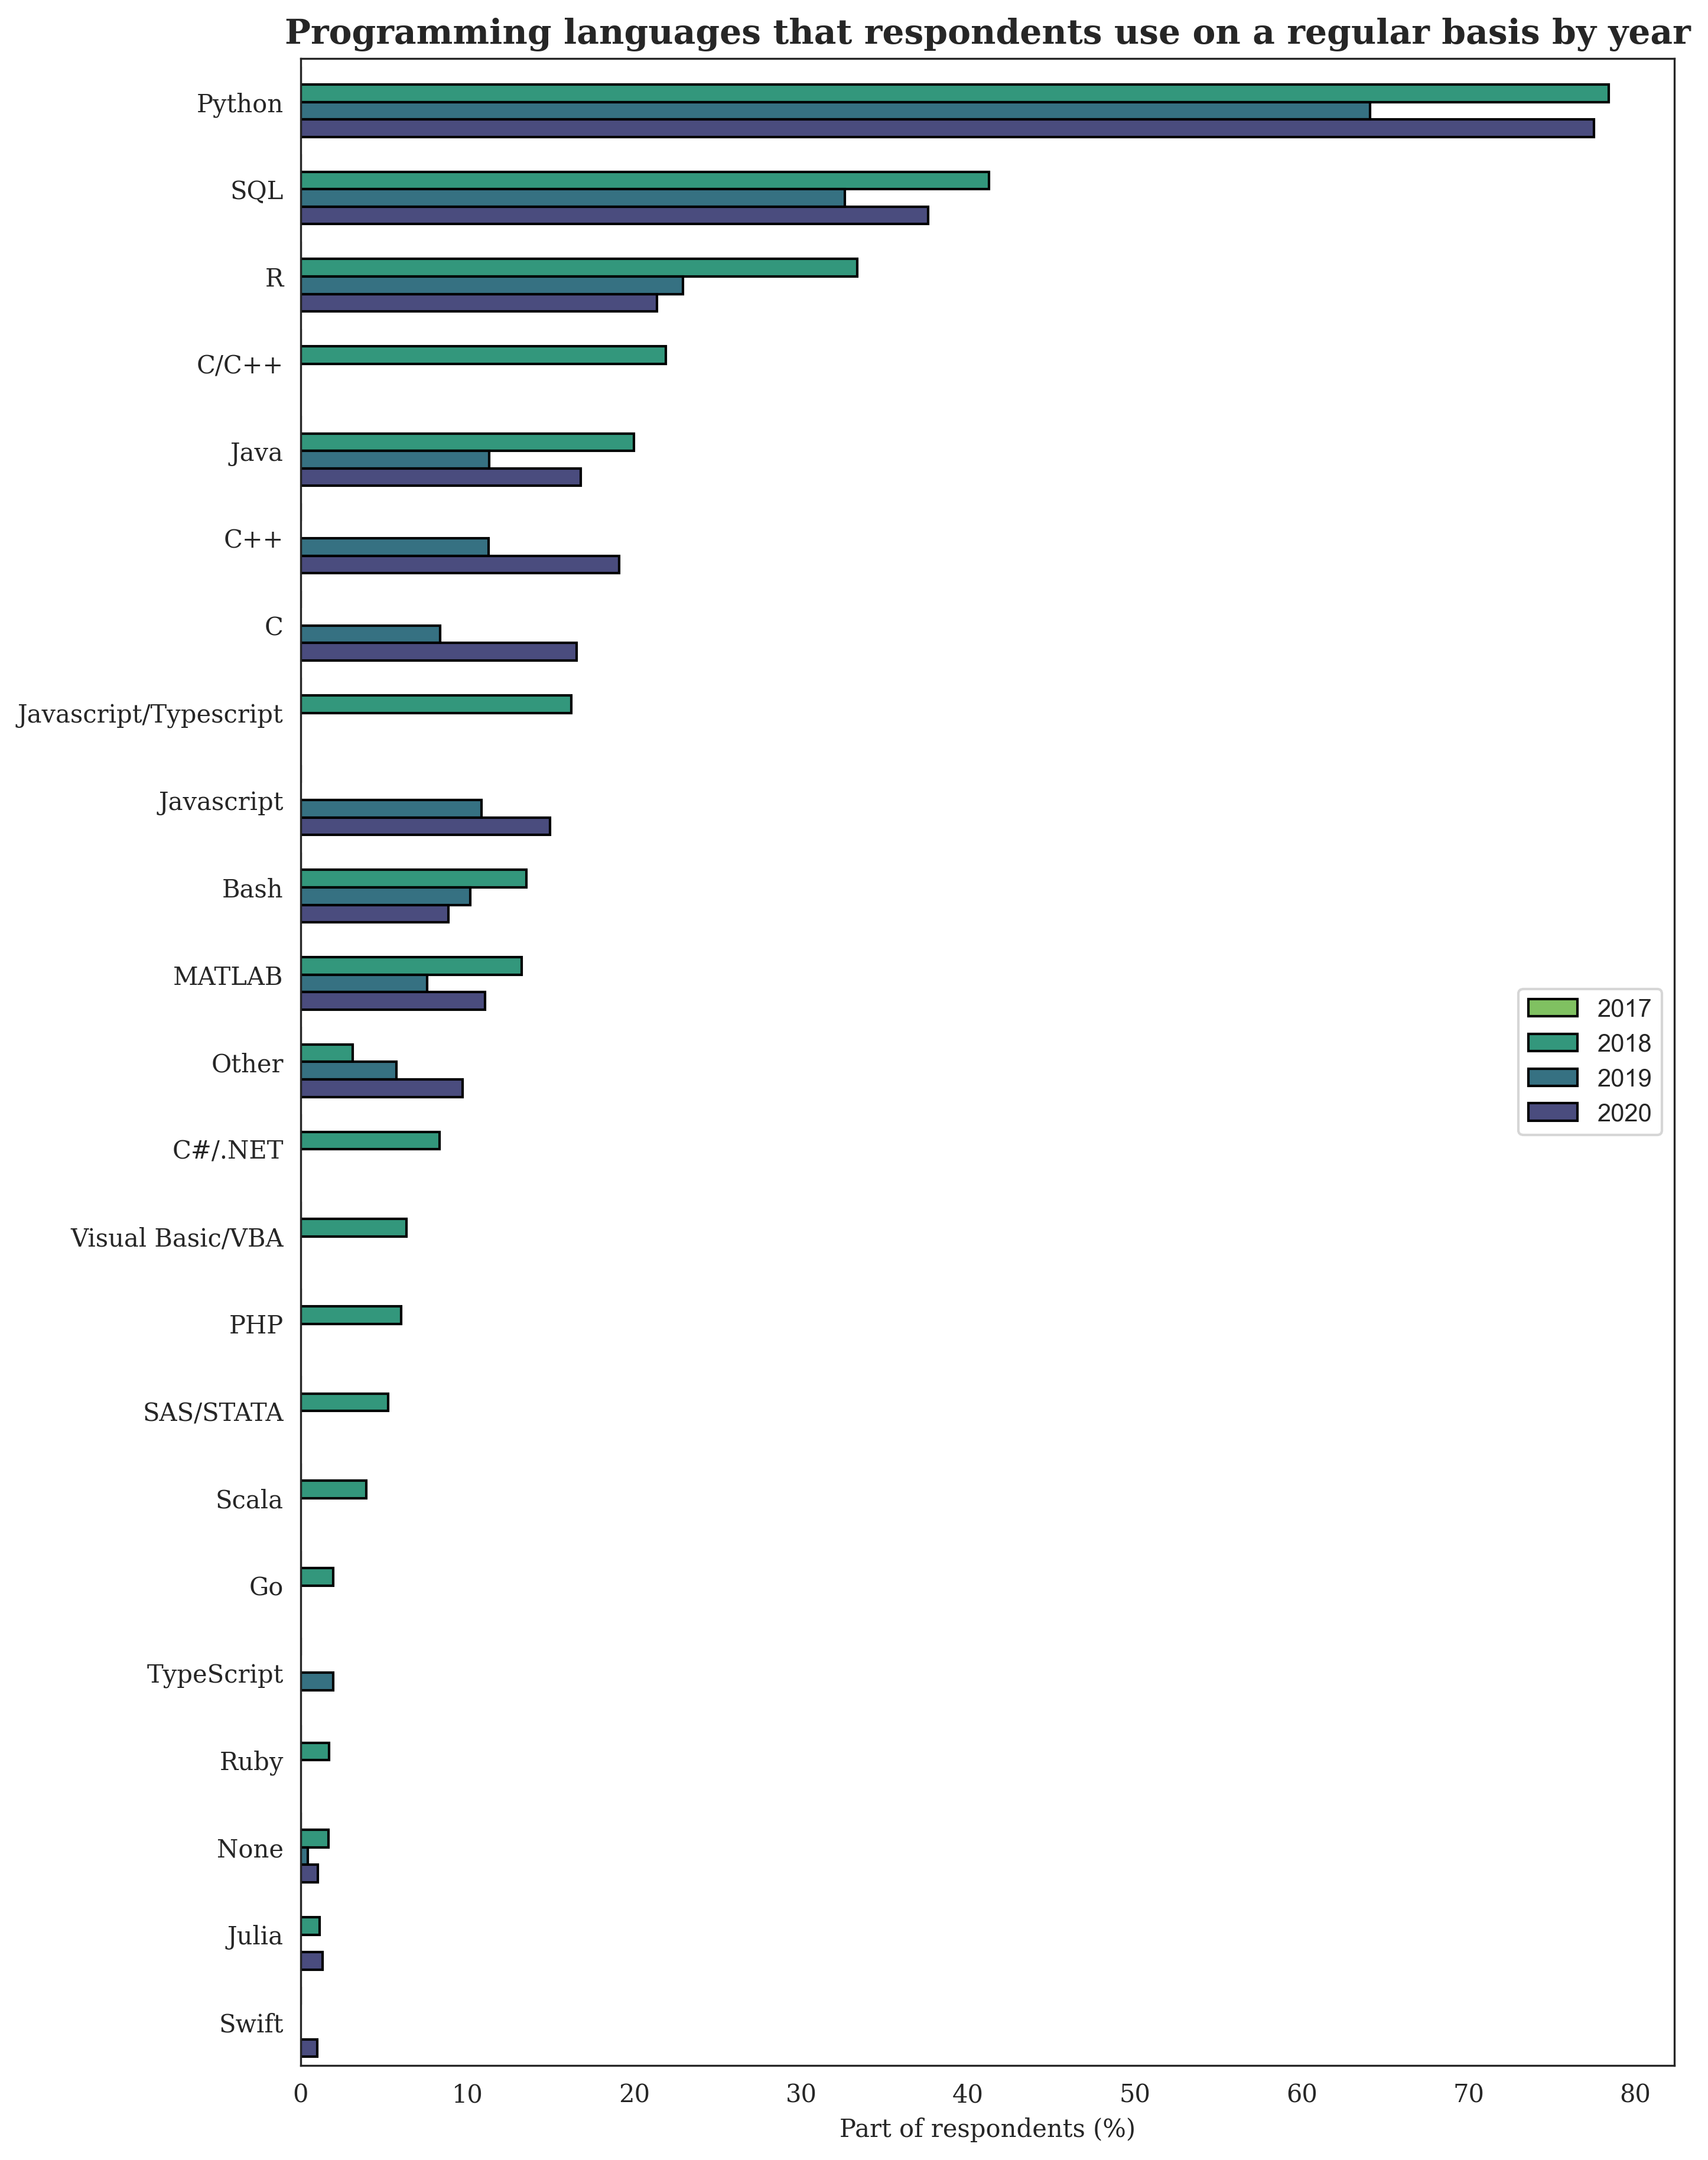

In [50]:
lang_2018 = lang_func(df_2018.iloc[:, 65:83], 2018)
lang_2019 = lang_func(df_2019.iloc[:, 82:94], 2019)
lang_2020 = lang_func(df.iloc[:, 7:20], 2020)
lang = pd.concat([lang_2018, lang_2019, lang_2020])
lang_2017 = pd.DataFrame({'lang': lang['lang'].unique(), 
                          'count': np.zeros(len(lang['lang'].unique())),
                          'perc': np.zeros(len(lang['lang'].unique())),
                          'year' : 2017})
lang = pd.concat([lang_2017, lang])
lang = lang.sort_values('perc', ascending = False)

plt.figure(figsize=(10, 15))
plt.title('Programming languages that respondents use on a regular basis by year', 
          size = 14, fontweight = 'bold', fontfamily = 'serif')

sns.barplot(y = lang['lang'], x = lang['perc'], edgecolor = 'black',
            hue = lang['year'],
            palette = reversed(sns.color_palette("viridis", 4)))
plt.legend(loc = 'center right')
plt.xlabel('Part of respondents (%)', fontfamily = 'serif')
plt.ylabel('')
plt.xticks(fontfamily = 'serif')
plt.yticks(fontfamily = 'serif')
plt.show()

In [51]:
def recom_lang(data, year):
    recomend_pl = data.value_counts().reset_index()
    recomend_pl.columns = ['lang', 'count']
    recomend_pl['perc'] = recomend_pl['count'] / len(data) * 100
    recomend_pl = recomend_pl.sort_values('perc', ascending = False)
    recomend_pl['year'] = year
    return recomend_pl

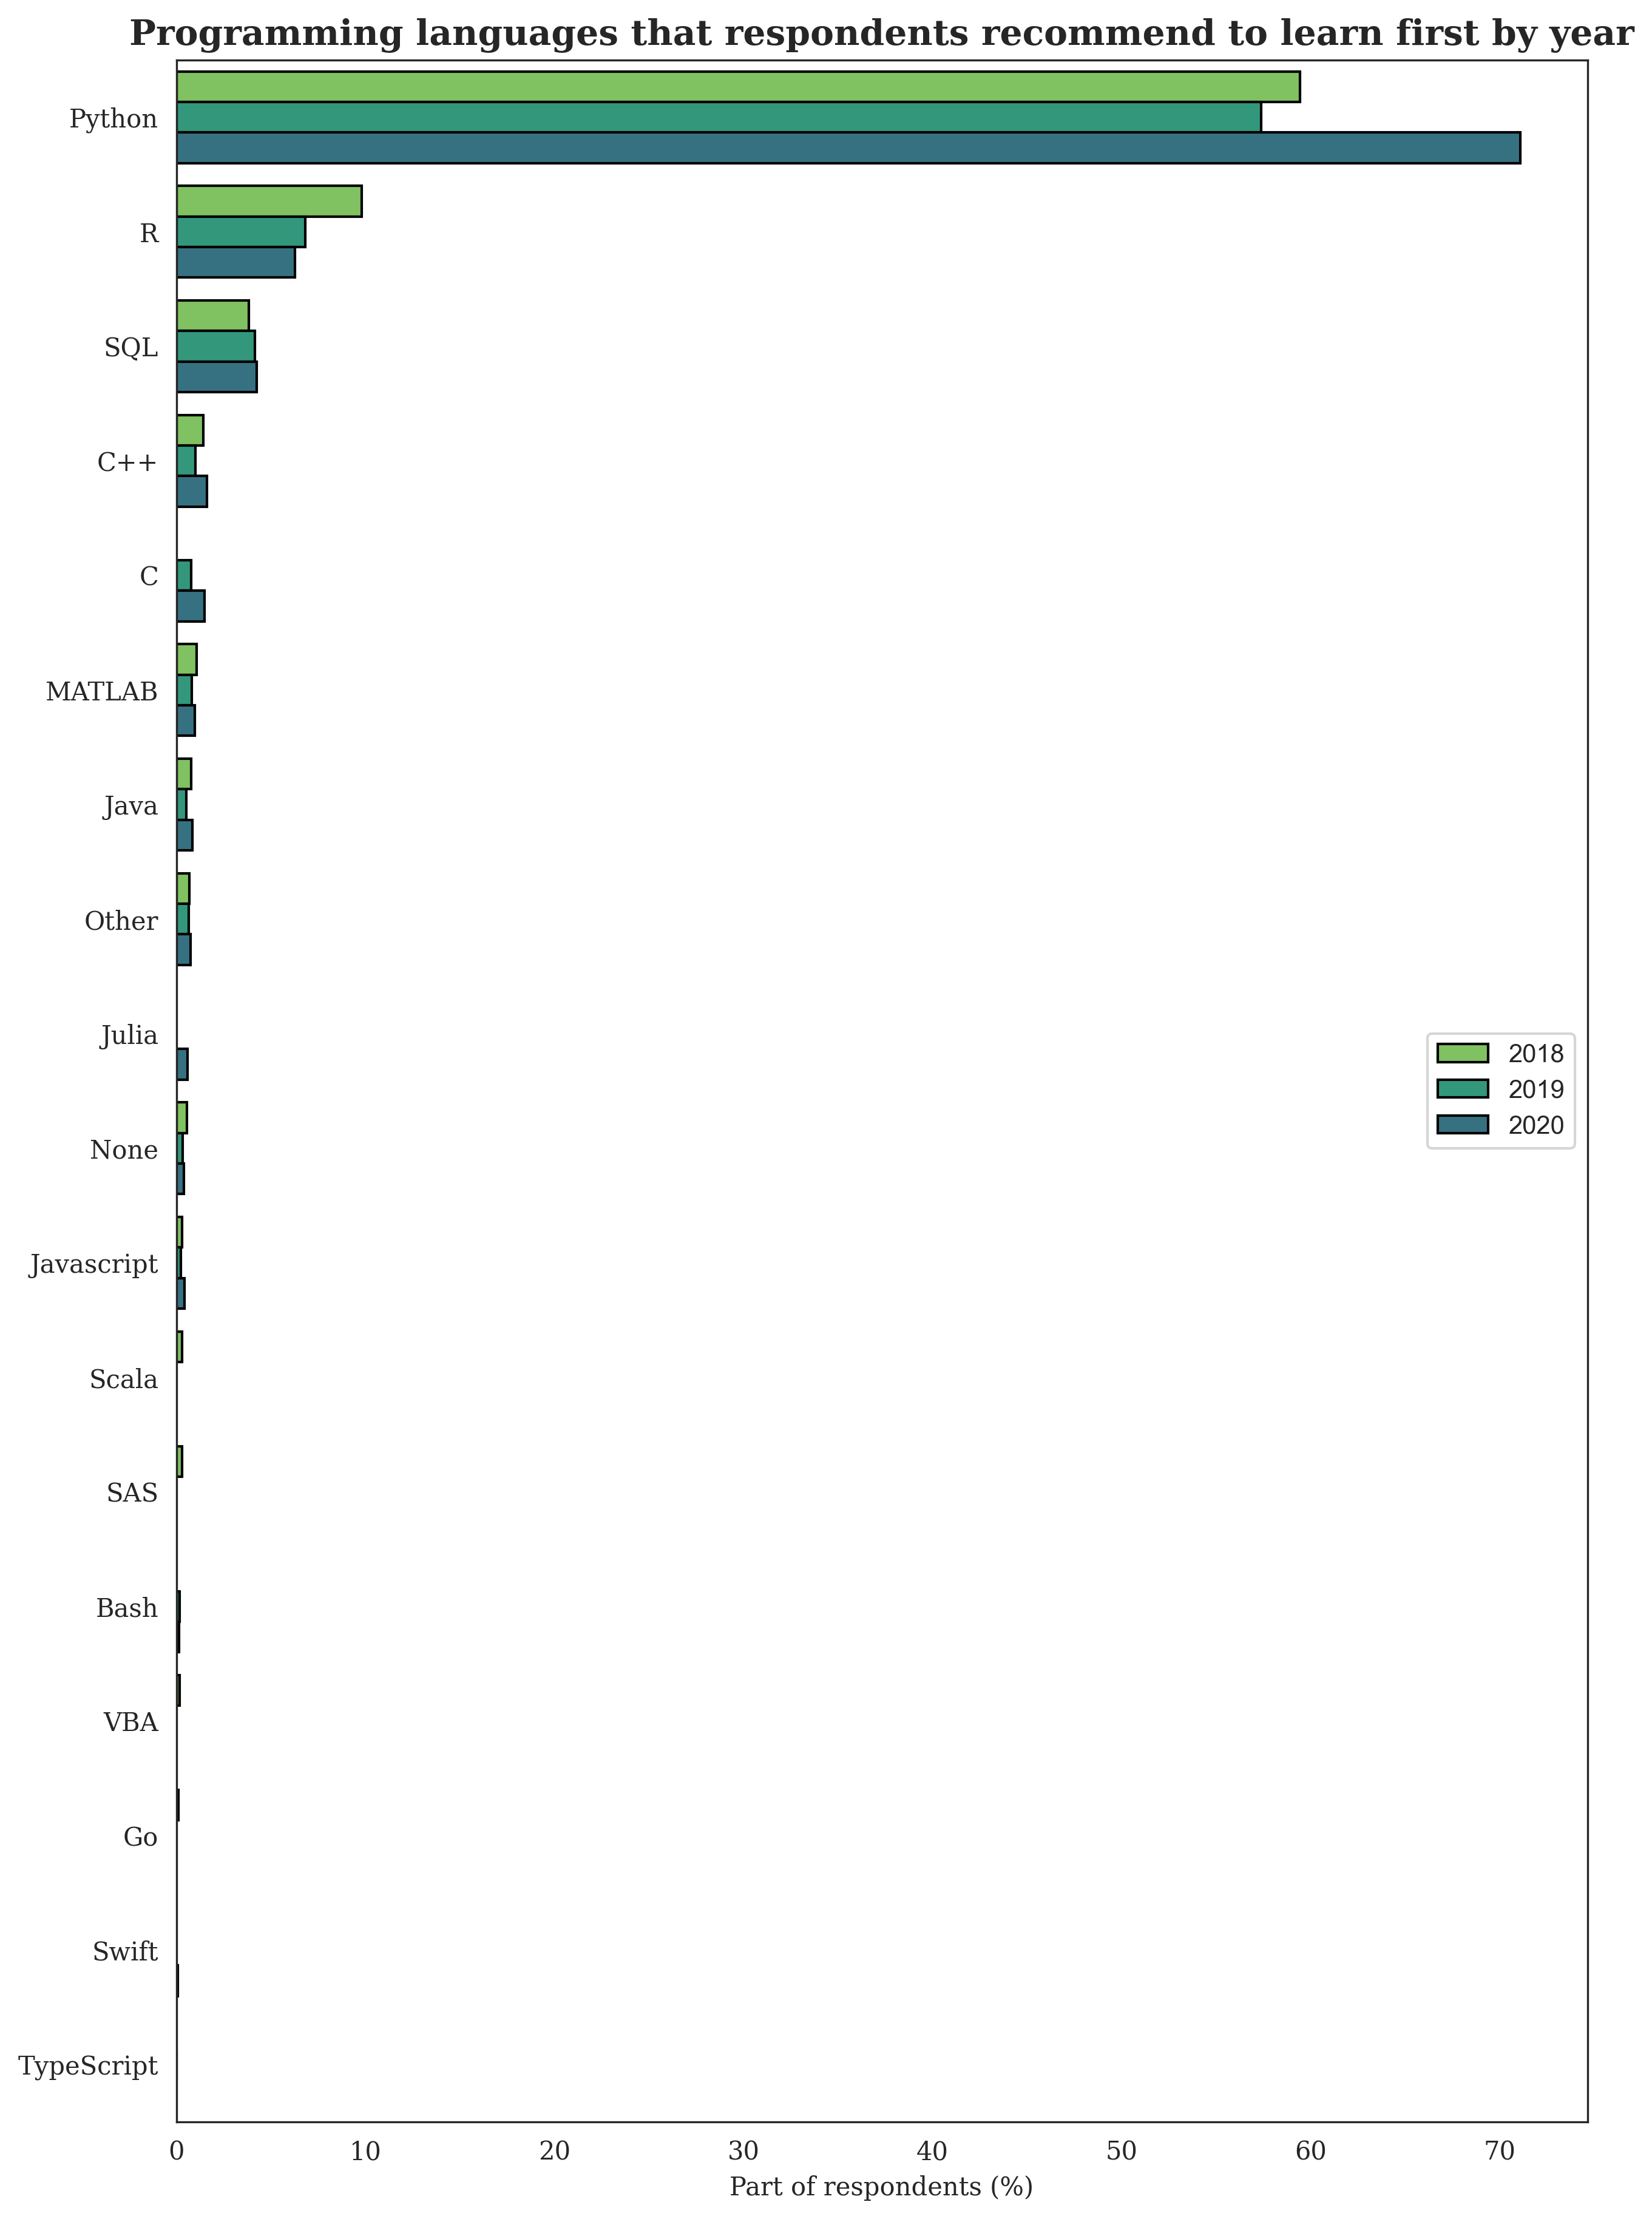

In [53]:
recom_2018 = recom_lang(df_2018.Q18, 2018)
recom_2019 = recom_lang(df_2019.Q19, 2019)
recom_2020 = recom_lang(df.Q8, 2020)
recom = pd.concat([recom_2018, recom_2019, recom_2020])
recom = recom.sort_values('perc', ascending = False)

plt.figure(figsize=(10, 15))
plt.title('Programming languages that respondents recommend to learn first by year', 
          size = 14, fontweight = 'bold', fontfamily = 'serif')

sns.barplot(y = recom['lang'], x = recom['perc'], edgecolor = 'black',
            hue = recom['year'],
            palette = reversed(sns.color_palette("viridis", 4)))
plt.legend(loc = 'center right')
plt.xlabel('Part of respondents (%)', fontfamily = 'serif')
plt.ylabel('')
plt.xticks(fontfamily = 'serif')
plt.yticks(fontfamily = 'serif')
plt.show()

The importance of Python as the most recommended programming language increases every year.